In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import lightgbm as lg
import xgboost as xgb

from cubist import Cubist
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor # GBM
from sklearn.metrics import *

%config InlineBackend.figure_format = 'retina' # plot 해상도 업

### Data loda

In [16]:
train_row = pd.read_csv('data/train_dataset.csv')
test_row = pd.read_csv('data/test_dataset_v01.csv')

In [17]:
print(train_row.shape)
print(test_row.shape)

(3664, 25)
(2441, 24)


In [18]:
train_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [19]:
test_row.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [20]:
train_row.drop('Unnamed: 0', axis=1, inplace=True)
test_row.drop('Unnamed: 0', axis=1, inplace=True)

### 원본 데이터 copy

In [21]:
train = train_row.copy()
test = test_row.copy()

In [22]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [23]:
test.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,97,0,80.0,17.0,17.0,4,0,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,37,0,22.0,15.0,15.0,3,1,0,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,44,0,NaN,20.0,20.0,3,3,0,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,43,2,NaN,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


### EDA

In [24]:
train['Result_v1'].value_counts()

benign       1858
malicious    1806
Name: Result_v1, dtype: int64

In [33]:
# target (정상 > 불량) : (0, 1)로 변환 
train.replace({'Result_v1' :'malicious'}, 0, inplace=True)
train.replace({'Result_v1' 'benign'}, 1, inplace=True)

In [35]:
train['Result_v1'].value_counts()

1    1858
0    1806
Name: Result_v1, dtype: int64

In [37]:
# 결측치 파악 
# - Boruta 알고리즘을 사용할 때는 결측치가 있으면 안 됨. 

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             1975 non-null   float64
 3   url_domain_len           1975 non-null   float64
 4   url_hostname_len         1978 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   int64  
 12  url_port                 2441 non-null   int64  
 13  html_num_tags('iframe')  2441 non-null   int64  
 14  html_num_tags('script') 

In [40]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64

In [41]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             466
url_hostname_len           463
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_chinese_present          0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
html_num_tags('applet')      0
dtype: int64

In [43]:
# 논문에서는 선형 보간으로 채웠음
from scipy import interpolate

In [45]:
train.interpolate(method='values', inplace=True)
test.interpolate(method='values', inplace=True)

In [47]:
print(train.isna().sum())
print(test.isna().sum())

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
dtype: int64
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
u

In [49]:
train.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')

In [51]:
import seaborn as sns

C:\Users\lab_user\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\lab_user\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


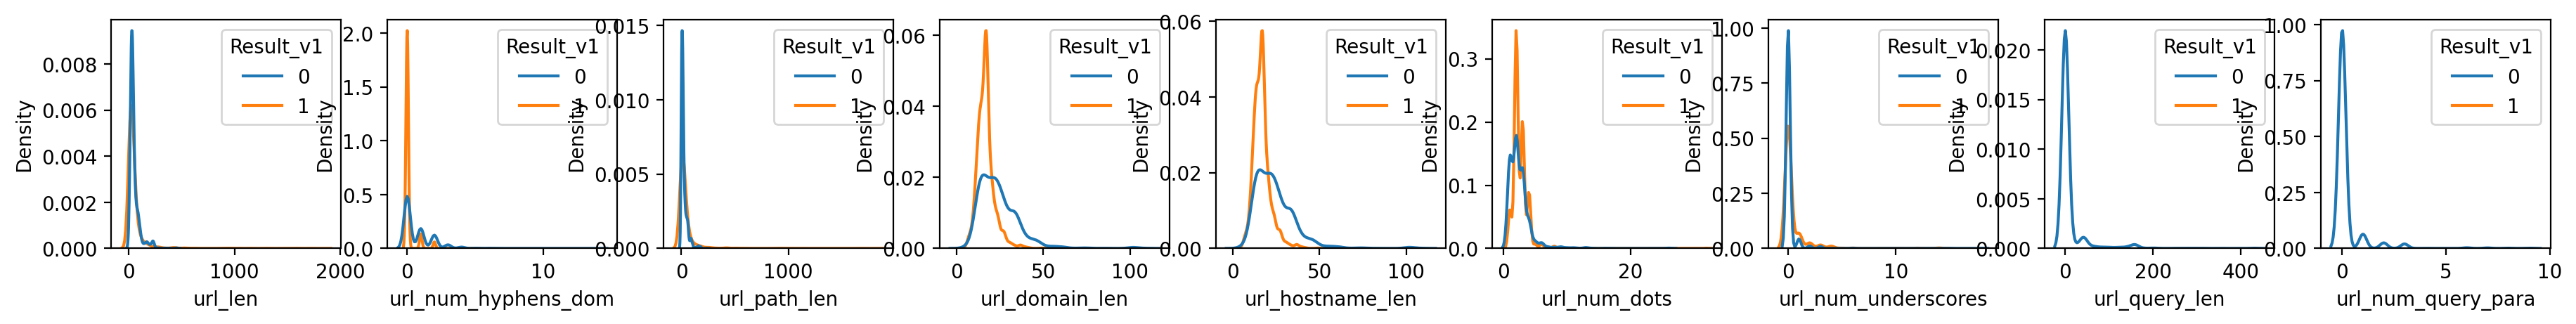

In [61]:
plt.figure(figsize=(30, 30))

plt.subplot(12,12, 1)
sns.kdeplot(data=train, x='url_len', hue='Result_v1')

plt.subplot(12,12, 2)
sns.kdeplot(data=train, x='url_num_hyphens_dom', hue='Result_v1')

plt.subplot(12, 12, 3)
sns.kdeplot(data=train, x='url_path_len', hue='Result_v1')

plt.subplot(12, 12, 4)
sns.kdeplot(data=train, x='url_domain_len', hue='Result_v1')

plt.subplot(12, 12, 5)
sns.kdeplot(data=train, x='url_hostname_len', hue='Result_v1')

plt.subplot(12, 12, 6)
sns.kdeplot(data=train, x='url_num_dots', hue='Result_v1')

plt.subplot(12, 12, 7)
sns.kdeplot(data=train, x='url_num_underscores', hue='Result_v1')

plt.subplot(12,12, 8)
sns.kdeplot(data=train, x='url_query_len', hue='Result_v1')

plt.subplot(12,12, 9)
sns.kdeplot(data=train, x='url_num_query_para', hue='Result_v1')

plt.show()

In [63]:
# 정상과 불량 간의 차이가 있는가? 
# - 정상 데이터

train['Result_v1'].value_counts()

1    1858
0    1806
Name: Result_v1, dtype: int64

### feature selection

In [69]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import *
from xgboost import XGBClassifier
from sklearn.metrics import *
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

In [70]:
target = 'Result_v1'

# x, y 분리 
x = train.drop(target, axis=1)
y = train[target]

# 학습용, 평가용 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2022)

In [72]:
# 모델 1
model_xgb = XGBClassifier(random_state=2022, eval_metric='mlogloss', use_label_encoder=False)

# 모델 학습
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train) # x_train에 대해 학습한 것을 feature로 추가 
xgb_test_pred = model_xgb.predict(test) # x_test도 동일하게 학습한 것을 feature로 추가

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
x_train.drop(columns='cat_pred', axis=1, inplace=True)
x_train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred
3499,37.0,0.0,20.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,...,17.0,0.0,0.0,32.0,1.0,1.0,2.0,29.0,0.0,1
3393,58.0,0.0,45.0,13.0,13.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,60.0,1.0,1.0,1.0,18.0,0.0,0
1048,34.0,0.0,17.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1
2141,21.0,0.0,6.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,18.0,1.0,1.0,1.0,58.0,0.0,1
2510,39.0,1.0,10.0,29.0,29.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,41.0,1.0,1.0,1.0,18.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,301.0,0.0,16.0,13.0,13.0,2.0,0.0,271.0,7.0,0.0,...,2.0,0.0,0.0,45.0,1.0,1.0,1.0,5.0,0.0,0
624,43.0,0.0,27.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,19.0,1.0,1.0,1.0,0.0,0.0,0
173,25.0,2.0,0.0,25.0,25.0,2.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,121.0,1.0,1.0,0.0,375.0,0.0,1
1244,96.0,0.0,79.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,12.0,1.0,1.0,1.0,3.0,0.0,1


In [92]:
# 모델 2
model_tree = RandomForestClassifier(random_state=2022, max_depth=13)

# 모델 학습
model_tree.fit(x_train, y_train)
tree_train_pred = model_tree.predict(x_train) 
tree_test_pred = model_tree.predict(test)

In [93]:
# feature 추가

# xgb model
x_train['tree_pred'] = tree_train_pred.astype(int)
test['tree_pred'] = tree_test_pred.astype(int)

x_train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred,tree_pred
3499,37.0,0.0,20.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,32.0,1.0,1.0,2.0,29.0,0.0,1,1
3393,58.0,0.0,45.0,13.0,13.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,60.0,1.0,1.0,1.0,18.0,0.0,0,0
1048,34.0,0.0,17.0,17.0,17.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1,1
2141,21.0,0.0,6.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,1.0,1.0,1.0,58.0,0.0,1,1
2510,39.0,1.0,10.0,29.0,29.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41.0,1.0,1.0,1.0,18.0,0.0,0,0


In [94]:
test

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),xgb_pred,tree_pred
0,97,0,80.000000,17.0,17.000000,4,0,0,0,0,...,0,0,12,1,1,1.0,3.000000,0,1,1
1,37,0,22.000000,15.0,15.000000,3,1,0,0,0,...,0,0,158,1,1,0.5,69.500000,0,1,1
2,44,0,18.000000,20.0,20.000000,3,3,0,0,0,...,3,3,34,1,1,0.0,136.000000,0,1,1
3,40,0,14.000000,26.0,26.000000,2,0,0,0,0,...,0,0,29,1,1,1.0,2.000000,0,0,0
4,43,2,7.500000,26.0,26.000000,2,0,0,0,0,...,0,0,41,1,1,1.0,10.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,63,0,5.666667,17.0,37.500000,4,2,0,0,0,...,0,0,79,1,1,1.0,119.000000,0,1,1
2437,36,0,1.000000,35.0,35.000000,2,0,0,0,0,...,0,0,57,1,1,1.0,87.666667,0,0,0
2438,45,1,23.000000,22.0,30.666667,2,0,0,0,0,...,0,0,199,1,1,2.0,56.333333,0,1,1
2439,24,0,10.000000,14.0,26.333333,3,0,0,0,1,...,0,0,90,1,1,2.0,25.000000,0,0,0


### 최종 평가 

In [98]:
# 모델 선언
model_xbg = XGBClassifier(random_state=2022, eval_metric='mlogloss', use_label_encoder=False)

# 모델 튜닝
# 파라미터 선언
params = {'max_depth' : range(5, 20),
          'learning_rate' : [0.001, 0.01, 0.1, 0.3, 1]
         }

# 최적 cv값 지정
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=2022)

# Random Search 선언 
model = RandomizedSearchCV(cat_model,
                           params,
                           cv=kfold,
                           scoring='accuracy')

# 모델 학습
model.fit(x, y)

# 결과 예측
y_pred = model.predict(test)

C:\Users\lab_user\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0:	learn: 0.5838902	total: 3.51ms	remaining: 3.51s
1:	learn: 0.4865100	total: 6.96ms	remaining: 3.47s
2:	learn: 0.4316239	total: 10.2ms	remaining: 3.39s
3:	learn: 0.3834385	total: 13.2ms	remaining: 3.29s
4:	learn: 0.3401560	total: 16.1ms	remaining: 3.2s
5:	learn: 0.3106393	total: 19.1ms	remaining: 3.16s
6:	learn: 0.2857943	total: 22.2ms	remaining: 3.15s
7:	learn: 0.2634730	total: 25.2ms	remaining: 3.12s
8:	learn: 0.2409611	total: 28.2ms	remaining: 3.1s
9:	learn: 0.2225924	total: 31.1ms	remaining: 3.08s
10:	learn: 0.2108261	total: 34ms	remaining: 3.05s
11:	learn: 0.2009550	total: 37ms	remaining: 3.04s
12:	learn: 0.1916942	total: 39.9ms	remaining: 3.03s
13:	learn: 0.1836067	total: 42.8ms	remaining: 3.01s
14:	learn: 0.1779130	total: 45.7ms	remaining: 3s
15:	learn: 0.1713998	total: 48.7ms	remaining: 3s
16:	learn: 0.1636417	total: 51.7ms	remaining: 2.99s
17:	learn: 0.1606786	total: 54.8ms	remaining: 2.99s
18:	learn: 0.1555907	total: 57.8ms	remaining: 2.98s
19:	learn: 0.1524691	total: 60.7ms

208:	learn: 0.0144239	total: 606ms	remaining: 2.29s
209:	learn: 0.0143163	total: 609ms	remaining: 2.29s
210:	learn: 0.0142620	total: 612ms	remaining: 2.29s
211:	learn: 0.0141672	total: 614ms	remaining: 2.28s
212:	learn: 0.0140046	total: 617ms	remaining: 2.28s
213:	learn: 0.0139599	total: 620ms	remaining: 2.28s
214:	learn: 0.0138818	total: 623ms	remaining: 2.28s
215:	learn: 0.0137930	total: 626ms	remaining: 2.27s
216:	learn: 0.0137384	total: 629ms	remaining: 2.27s
217:	learn: 0.0136583	total: 632ms	remaining: 2.27s
218:	learn: 0.0134715	total: 635ms	remaining: 2.27s
219:	learn: 0.0133997	total: 638ms	remaining: 2.26s
220:	learn: 0.0132968	total: 641ms	remaining: 2.26s
221:	learn: 0.0131851	total: 644ms	remaining: 2.26s
222:	learn: 0.0130820	total: 647ms	remaining: 2.25s
223:	learn: 0.0129330	total: 650ms	remaining: 2.25s
224:	learn: 0.0128780	total: 653ms	remaining: 2.25s
225:	learn: 0.0128243	total: 656ms	remaining: 2.25s
226:	learn: 0.0127202	total: 659ms	remaining: 2.24s
227:	learn: 

417:	learn: 0.0054638	total: 1.22s	remaining: 1.69s
418:	learn: 0.0054442	total: 1.22s	remaining: 1.69s
419:	learn: 0.0054169	total: 1.22s	remaining: 1.69s
420:	learn: 0.0054006	total: 1.22s	remaining: 1.68s
421:	learn: 0.0054005	total: 1.23s	remaining: 1.68s
422:	learn: 0.0053893	total: 1.23s	remaining: 1.68s
423:	learn: 0.0053755	total: 1.23s	remaining: 1.67s
424:	learn: 0.0053754	total: 1.24s	remaining: 1.67s
425:	learn: 0.0053754	total: 1.24s	remaining: 1.67s
426:	learn: 0.0053637	total: 1.24s	remaining: 1.67s
427:	learn: 0.0053637	total: 1.24s	remaining: 1.66s
428:	learn: 0.0053636	total: 1.25s	remaining: 1.66s
429:	learn: 0.0053635	total: 1.25s	remaining: 1.66s
430:	learn: 0.0053497	total: 1.25s	remaining: 1.65s
431:	learn: 0.0053207	total: 1.25s	remaining: 1.65s
432:	learn: 0.0053090	total: 1.26s	remaining: 1.65s
433:	learn: 0.0053035	total: 1.26s	remaining: 1.64s
434:	learn: 0.0053034	total: 1.26s	remaining: 1.64s
435:	learn: 0.0053034	total: 1.26s	remaining: 1.64s
436:	learn: 

637:	learn: 0.0043878	total: 1.82s	remaining: 1.03s
638:	learn: 0.0043878	total: 1.83s	remaining: 1.03s
639:	learn: 0.0043849	total: 1.83s	remaining: 1.03s
640:	learn: 0.0043849	total: 1.83s	remaining: 1.02s
641:	learn: 0.0043849	total: 1.83s	remaining: 1.02s
642:	learn: 0.0043848	total: 1.84s	remaining: 1.02s
643:	learn: 0.0043849	total: 1.84s	remaining: 1.02s
644:	learn: 0.0043848	total: 1.84s	remaining: 1.01s
645:	learn: 0.0043727	total: 1.84s	remaining: 1.01s
646:	learn: 0.0043534	total: 1.85s	remaining: 1.01s
647:	learn: 0.0043406	total: 1.85s	remaining: 1s
648:	learn: 0.0043406	total: 1.85s	remaining: 1s
649:	learn: 0.0043290	total: 1.86s	remaining: 1000ms
650:	learn: 0.0043132	total: 1.86s	remaining: 997ms
651:	learn: 0.0043131	total: 1.86s	remaining: 994ms
652:	learn: 0.0043131	total: 1.86s	remaining: 991ms
653:	learn: 0.0043125	total: 1.87s	remaining: 988ms
654:	learn: 0.0043126	total: 1.87s	remaining: 985ms
655:	learn: 0.0043126	total: 1.87s	remaining: 982ms
656:	learn: 0.004

860:	learn: 0.0037488	total: 2.43s	remaining: 393ms
861:	learn: 0.0037488	total: 2.44s	remaining: 390ms
862:	learn: 0.0037488	total: 2.44s	remaining: 387ms
863:	learn: 0.0037486	total: 2.44s	remaining: 384ms
864:	learn: 0.0037486	total: 2.44s	remaining: 382ms
865:	learn: 0.0037486	total: 2.45s	remaining: 379ms
866:	learn: 0.0037484	total: 2.45s	remaining: 376ms
867:	learn: 0.0037484	total: 2.45s	remaining: 373ms
868:	learn: 0.0037484	total: 2.46s	remaining: 370ms
869:	learn: 0.0037484	total: 2.46s	remaining: 367ms
870:	learn: 0.0037483	total: 2.46s	remaining: 365ms
871:	learn: 0.0037484	total: 2.46s	remaining: 362ms
872:	learn: 0.0037483	total: 2.47s	remaining: 359ms
873:	learn: 0.0037483	total: 2.47s	remaining: 356ms
874:	learn: 0.0037482	total: 2.47s	remaining: 353ms
875:	learn: 0.0037483	total: 2.48s	remaining: 350ms
876:	learn: 0.0037483	total: 2.48s	remaining: 348ms
877:	learn: 0.0037483	total: 2.48s	remaining: 345ms
878:	learn: 0.0037483	total: 2.48s	remaining: 342ms
879:	learn: 

71:	learn: 0.0650492	total: 213ms	remaining: 2.74s
72:	learn: 0.0637287	total: 216ms	remaining: 2.74s
73:	learn: 0.0628123	total: 219ms	remaining: 2.74s
74:	learn: 0.0623219	total: 222ms	remaining: 2.73s
75:	learn: 0.0616713	total: 225ms	remaining: 2.73s
76:	learn: 0.0605725	total: 228ms	remaining: 2.73s
77:	learn: 0.0594362	total: 231ms	remaining: 2.73s
78:	learn: 0.0587026	total: 234ms	remaining: 2.72s
79:	learn: 0.0572622	total: 237ms	remaining: 2.72s
80:	learn: 0.0563596	total: 240ms	remaining: 2.72s
81:	learn: 0.0559952	total: 243ms	remaining: 2.71s
82:	learn: 0.0556809	total: 245ms	remaining: 2.71s
83:	learn: 0.0548051	total: 248ms	remaining: 2.71s
84:	learn: 0.0539609	total: 251ms	remaining: 2.71s
85:	learn: 0.0530362	total: 254ms	remaining: 2.7s
86:	learn: 0.0520700	total: 257ms	remaining: 2.7s
87:	learn: 0.0514689	total: 260ms	remaining: 2.69s
88:	learn: 0.0508270	total: 263ms	remaining: 2.69s
89:	learn: 0.0501278	total: 266ms	remaining: 2.69s
90:	learn: 0.0493911	total: 269ms

279:	learn: 0.0086689	total: 823ms	remaining: 2.12s
280:	learn: 0.0086159	total: 826ms	remaining: 2.11s
281:	learn: 0.0085626	total: 829ms	remaining: 2.11s
282:	learn: 0.0084950	total: 832ms	remaining: 2.11s
283:	learn: 0.0084446	total: 835ms	remaining: 2.1s
284:	learn: 0.0083788	total: 838ms	remaining: 2.1s
285:	learn: 0.0083048	total: 841ms	remaining: 2.1s
286:	learn: 0.0083047	total: 844ms	remaining: 2.1s
287:	learn: 0.0082501	total: 847ms	remaining: 2.09s
288:	learn: 0.0082053	total: 850ms	remaining: 2.09s
289:	learn: 0.0081864	total: 853ms	remaining: 2.09s
290:	learn: 0.0081345	total: 855ms	remaining: 2.08s
291:	learn: 0.0080648	total: 859ms	remaining: 2.08s
292:	learn: 0.0080489	total: 861ms	remaining: 2.08s
293:	learn: 0.0080066	total: 864ms	remaining: 2.08s
294:	learn: 0.0079722	total: 867ms	remaining: 2.07s
295:	learn: 0.0078917	total: 870ms	remaining: 2.07s
296:	learn: 0.0078588	total: 873ms	remaining: 2.07s
297:	learn: 0.0078190	total: 876ms	remaining: 2.06s
298:	learn: 0.00

486:	learn: 0.0041388	total: 1.43s	remaining: 1.51s
487:	learn: 0.0041231	total: 1.44s	remaining: 1.51s
488:	learn: 0.0041087	total: 1.44s	remaining: 1.5s
489:	learn: 0.0040914	total: 1.44s	remaining: 1.5s
490:	learn: 0.0040914	total: 1.45s	remaining: 1.5s
491:	learn: 0.0040914	total: 1.45s	remaining: 1.5s
492:	learn: 0.0040914	total: 1.45s	remaining: 1.49s
493:	learn: 0.0040913	total: 1.45s	remaining: 1.49s
494:	learn: 0.0040743	total: 1.46s	remaining: 1.49s
495:	learn: 0.0040552	total: 1.46s	remaining: 1.48s
496:	learn: 0.0040414	total: 1.46s	remaining: 1.48s
497:	learn: 0.0040413	total: 1.47s	remaining: 1.48s
498:	learn: 0.0040413	total: 1.47s	remaining: 1.47s
499:	learn: 0.0040385	total: 1.47s	remaining: 1.47s
500:	learn: 0.0040237	total: 1.47s	remaining: 1.47s
501:	learn: 0.0040237	total: 1.48s	remaining: 1.46s
502:	learn: 0.0040104	total: 1.48s	remaining: 1.46s
503:	learn: 0.0040009	total: 1.48s	remaining: 1.46s
504:	learn: 0.0039839	total: 1.49s	remaining: 1.46s
505:	learn: 0.00

705:	learn: 0.0033661	total: 2.04s	remaining: 851ms
706:	learn: 0.0033660	total: 2.04s	remaining: 848ms
707:	learn: 0.0033661	total: 2.05s	remaining: 845ms
708:	learn: 0.0033497	total: 2.05s	remaining: 843ms
709:	learn: 0.0033447	total: 2.06s	remaining: 840ms
710:	learn: 0.0033446	total: 2.06s	remaining: 837ms
711:	learn: 0.0033446	total: 2.06s	remaining: 834ms
712:	learn: 0.0033446	total: 2.06s	remaining: 831ms
713:	learn: 0.0033445	total: 2.07s	remaining: 828ms
714:	learn: 0.0033446	total: 2.07s	remaining: 825ms
715:	learn: 0.0033446	total: 2.07s	remaining: 822ms
716:	learn: 0.0033445	total: 2.08s	remaining: 819ms
717:	learn: 0.0033432	total: 2.08s	remaining: 816ms
718:	learn: 0.0033432	total: 2.08s	remaining: 813ms
719:	learn: 0.0033334	total: 2.08s	remaining: 810ms
720:	learn: 0.0033334	total: 2.09s	remaining: 807ms
721:	learn: 0.0033334	total: 2.09s	remaining: 804ms
722:	learn: 0.0033334	total: 2.09s	remaining: 801ms
723:	learn: 0.0033333	total: 2.09s	remaining: 798ms
724:	learn: 

928:	learn: 0.0031634	total: 2.65s	remaining: 203ms
929:	learn: 0.0031634	total: 2.65s	remaining: 200ms
930:	learn: 0.0031526	total: 2.65s	remaining: 197ms
931:	learn: 0.0031526	total: 2.66s	remaining: 194ms
932:	learn: 0.0031408	total: 2.66s	remaining: 191ms
933:	learn: 0.0031407	total: 2.66s	remaining: 188ms
934:	learn: 0.0031344	total: 2.67s	remaining: 185ms
935:	learn: 0.0031343	total: 2.67s	remaining: 183ms
936:	learn: 0.0031343	total: 2.67s	remaining: 180ms
937:	learn: 0.0031343	total: 2.67s	remaining: 177ms
938:	learn: 0.0031239	total: 2.68s	remaining: 174ms
939:	learn: 0.0031238	total: 2.68s	remaining: 171ms
940:	learn: 0.0031238	total: 2.68s	remaining: 168ms
941:	learn: 0.0031104	total: 2.69s	remaining: 165ms
942:	learn: 0.0031019	total: 2.69s	remaining: 163ms
943:	learn: 0.0031017	total: 2.69s	remaining: 160ms
944:	learn: 0.0031017	total: 2.69s	remaining: 157ms
945:	learn: 0.0031017	total: 2.7s	remaining: 154ms
946:	learn: 0.0031016	total: 2.7s	remaining: 151ms
947:	learn: 0.

87:	learn: 0.5898866	total: 9.67s	remaining: 1m 40s
88:	learn: 0.5888469	total: 9.81s	remaining: 1m 40s
89:	learn: 0.5877735	total: 9.94s	remaining: 1m 40s
90:	learn: 0.5866838	total: 10.1s	remaining: 1m 40s
91:	learn: 0.5856515	total: 10.2s	remaining: 1m 40s
92:	learn: 0.5848224	total: 10.2s	remaining: 1m 39s
93:	learn: 0.5837074	total: 10.4s	remaining: 1m 40s
94:	learn: 0.5826149	total: 10.5s	remaining: 1m 40s
95:	learn: 0.5815873	total: 10.7s	remaining: 1m 40s
96:	learn: 0.5805428	total: 10.8s	remaining: 1m 40s
97:	learn: 0.5794975	total: 10.9s	remaining: 1m 40s
98:	learn: 0.5784522	total: 11.1s	remaining: 1m 40s
99:	learn: 0.5774029	total: 11.1s	remaining: 1m 39s
100:	learn: 0.5763394	total: 11.2s	remaining: 1m 39s
101:	learn: 0.5752787	total: 11.3s	remaining: 1m 39s
102:	learn: 0.5742709	total: 11.4s	remaining: 1m 39s
103:	learn: 0.5735812	total: 11.4s	remaining: 1m 38s
104:	learn: 0.5725755	total: 11.5s	remaining: 1m 38s
105:	learn: 0.5715801	total: 11.7s	remaining: 1m 38s
106:	l

243:	learn: 0.4533293	total: 27s	remaining: 1m 23s
244:	learn: 0.4525928	total: 27.2s	remaining: 1m 23s
245:	learn: 0.4518474	total: 27.3s	remaining: 1m 23s
246:	learn: 0.4511114	total: 27.4s	remaining: 1m 23s
247:	learn: 0.4504651	total: 27.6s	remaining: 1m 23s
248:	learn: 0.4497612	total: 27.7s	remaining: 1m 23s
249:	learn: 0.4490345	total: 27.8s	remaining: 1m 23s
250:	learn: 0.4483122	total: 28s	remaining: 1m 23s
251:	learn: 0.4475544	total: 28.1s	remaining: 1m 23s
252:	learn: 0.4468604	total: 28.2s	remaining: 1m 23s
253:	learn: 0.4460835	total: 28.4s	remaining: 1m 23s
254:	learn: 0.4453647	total: 28.4s	remaining: 1m 23s
255:	learn: 0.4446189	total: 28.5s	remaining: 1m 22s
256:	learn: 0.4440008	total: 28.7s	remaining: 1m 22s
257:	learn: 0.4432953	total: 28.8s	remaining: 1m 22s
258:	learn: 0.4426224	total: 29s	remaining: 1m 22s
259:	learn: 0.4419245	total: 29.1s	remaining: 1m 22s
260:	learn: 0.4414033	total: 29.1s	remaining: 1m 22s
261:	learn: 0.4406660	total: 29.2s	remaining: 1m 22s

400:	learn: 0.3592844	total: 45.2s	remaining: 1m 7s
401:	learn: 0.3587719	total: 45.3s	remaining: 1m 7s
402:	learn: 0.3582309	total: 45.5s	remaining: 1m 7s
403:	learn: 0.3577396	total: 45.6s	remaining: 1m 7s
404:	learn: 0.3573317	total: 45.6s	remaining: 1m 7s
405:	learn: 0.3568269	total: 45.7s	remaining: 1m 6s
406:	learn: 0.3563217	total: 45.8s	remaining: 1m 6s
407:	learn: 0.3557733	total: 46s	remaining: 1m 6s
408:	learn: 0.3553366	total: 46.1s	remaining: 1m 6s
409:	learn: 0.3548255	total: 46.2s	remaining: 1m 6s
410:	learn: 0.3542807	total: 46.4s	remaining: 1m 6s
411:	learn: 0.3537782	total: 46.5s	remaining: 1m 6s
412:	learn: 0.3532437	total: 46.6s	remaining: 1m 6s
413:	learn: 0.3527654	total: 46.8s	remaining: 1m 6s
414:	learn: 0.3523072	total: 46.9s	remaining: 1m 6s
415:	learn: 0.3518329	total: 47.1s	remaining: 1m 6s
416:	learn: 0.3513104	total: 47.2s	remaining: 1m 5s
417:	learn: 0.3508305	total: 47.3s	remaining: 1m 5s
418:	learn: 0.3504265	total: 47.5s	remaining: 1m 5s
419:	learn: 0.

560:	learn: 0.2934785	total: 1m 4s	remaining: 50.2s
561:	learn: 0.2931992	total: 1m 4s	remaining: 50.1s
562:	learn: 0.2928927	total: 1m 4s	remaining: 49.9s
563:	learn: 0.2925141	total: 1m 4s	remaining: 49.8s
564:	learn: 0.2921481	total: 1m 4s	remaining: 49.7s
565:	learn: 0.2918041	total: 1m 4s	remaining: 49.6s
566:	learn: 0.2914630	total: 1m 4s	remaining: 49.4s
567:	learn: 0.2911103	total: 1m 4s	remaining: 49.3s
568:	learn: 0.2907678	total: 1m 4s	remaining: 49.2s
569:	learn: 0.2904008	total: 1m 5s	remaining: 49.1s
570:	learn: 0.2899929	total: 1m 5s	remaining: 49s
571:	learn: 0.2896024	total: 1m 5s	remaining: 48.9s
572:	learn: 0.2892830	total: 1m 5s	remaining: 48.8s
573:	learn: 0.2889277	total: 1m 5s	remaining: 48.7s
574:	learn: 0.2885586	total: 1m 5s	remaining: 48.6s
575:	learn: 0.2881890	total: 1m 5s	remaining: 48.5s
576:	learn: 0.2878047	total: 1m 6s	remaining: 48.4s
577:	learn: 0.2874713	total: 1m 6s	remaining: 48.3s
578:	learn: 0.2871462	total: 1m 6s	remaining: 48.2s
579:	learn: 0.

717:	learn: 0.2461003	total: 1m 23s	remaining: 32.7s
718:	learn: 0.2458770	total: 1m 23s	remaining: 32.6s
719:	learn: 0.2455889	total: 1m 23s	remaining: 32.5s
720:	learn: 0.2452929	total: 1m 23s	remaining: 32.4s
721:	learn: 0.2450483	total: 1m 23s	remaining: 32.2s
722:	learn: 0.2447813	total: 1m 23s	remaining: 32.1s
723:	learn: 0.2445372	total: 1m 24s	remaining: 32s
724:	learn: 0.2442750	total: 1m 24s	remaining: 31.9s
725:	learn: 0.2440362	total: 1m 24s	remaining: 31.8s
726:	learn: 0.2437754	total: 1m 24s	remaining: 31.7s
727:	learn: 0.2434982	total: 1m 24s	remaining: 31.6s
728:	learn: 0.2432439	total: 1m 24s	remaining: 31.4s
729:	learn: 0.2429799	total: 1m 24s	remaining: 31.3s
730:	learn: 0.2427363	total: 1m 24s	remaining: 31.2s
731:	learn: 0.2424763	total: 1m 24s	remaining: 31.1s
732:	learn: 0.2422333	total: 1m 25s	remaining: 31s
733:	learn: 0.2419647	total: 1m 25s	remaining: 30.9s
734:	learn: 0.2417275	total: 1m 25s	remaining: 30.7s
735:	learn: 0.2414708	total: 1m 25s	remaining: 30.

873:	learn: 0.2108464	total: 1m 44s	remaining: 15s
874:	learn: 0.2106439	total: 1m 44s	remaining: 14.9s
875:	learn: 0.2104300	total: 1m 44s	remaining: 14.8s
876:	learn: 0.2102250	total: 1m 44s	remaining: 14.7s
877:	learn: 0.2100640	total: 1m 44s	remaining: 14.5s
878:	learn: 0.2098825	total: 1m 44s	remaining: 14.4s
879:	learn: 0.2097091	total: 1m 44s	remaining: 14.3s
880:	learn: 0.2095070	total: 1m 45s	remaining: 14.2s
881:	learn: 0.2092973	total: 1m 45s	remaining: 14.1s
882:	learn: 0.2090971	total: 1m 45s	remaining: 14s
883:	learn: 0.2089087	total: 1m 45s	remaining: 13.8s
884:	learn: 0.2087151	total: 1m 45s	remaining: 13.7s
885:	learn: 0.2084935	total: 1m 45s	remaining: 13.6s
886:	learn: 0.2082746	total: 1m 45s	remaining: 13.5s
887:	learn: 0.2080494	total: 1m 45s	remaining: 13.4s
888:	learn: 0.2078635	total: 1m 46s	remaining: 13.2s
889:	learn: 0.2077042	total: 1m 46s	remaining: 13.1s
890:	learn: 0.2075035	total: 1m 46s	remaining: 13s
891:	learn: 0.2072835	total: 1m 46s	remaining: 12.9s

31:	learn: 0.6554404	total: 3.83s	remaining: 1m 55s
32:	learn: 0.6542990	total: 3.96s	remaining: 1m 56s
33:	learn: 0.6530675	total: 4.11s	remaining: 1m 56s
34:	learn: 0.6520406	total: 4.24s	remaining: 1m 56s
35:	learn: 0.6508782	total: 4.38s	remaining: 1m 57s
36:	learn: 0.6497395	total: 4.52s	remaining: 1m 57s
37:	learn: 0.6485317	total: 4.65s	remaining: 1m 57s
38:	learn: 0.6474569	total: 4.79s	remaining: 1m 58s
39:	learn: 0.6464004	total: 4.92s	remaining: 1m 58s
40:	learn: 0.6453983	total: 5.06s	remaining: 1m 58s
41:	learn: 0.6443465	total: 5.2s	remaining: 1m 58s
42:	learn: 0.6431839	total: 5.33s	remaining: 1m 58s
43:	learn: 0.6421759	total: 5.47s	remaining: 1m 58s
44:	learn: 0.6410251	total: 5.61s	remaining: 1m 59s
45:	learn: 0.6398767	total: 5.74s	remaining: 1m 59s
46:	learn: 0.6392024	total: 5.75s	remaining: 1m 56s
47:	learn: 0.6380916	total: 5.88s	remaining: 1m 56s
48:	learn: 0.6370000	total: 6.02s	remaining: 1m 56s
49:	learn: 0.6359116	total: 6.15s	remaining: 1m 56s
50:	learn: 0.

188:	learn: 0.5058929	total: 21.8s	remaining: 1m 33s
189:	learn: 0.5050641	total: 21.9s	remaining: 1m 33s
190:	learn: 0.5042823	total: 22s	remaining: 1m 33s
191:	learn: 0.5035000	total: 22.2s	remaining: 1m 33s
192:	learn: 0.5026847	total: 22.3s	remaining: 1m 33s
193:	learn: 0.5018789	total: 22.4s	remaining: 1m 33s
194:	learn: 0.5011324	total: 22.6s	remaining: 1m 33s
195:	learn: 0.5003319	total: 22.7s	remaining: 1m 33s
196:	learn: 0.4995486	total: 22.7s	remaining: 1m 32s
197:	learn: 0.4986973	total: 22.9s	remaining: 1m 32s
198:	learn: 0.4980082	total: 23s	remaining: 1m 32s
199:	learn: 0.4972305	total: 23.2s	remaining: 1m 32s
200:	learn: 0.4964254	total: 23.3s	remaining: 1m 32s
201:	learn: 0.4956914	total: 23.4s	remaining: 1m 32s
202:	learn: 0.4949007	total: 23.6s	remaining: 1m 32s
203:	learn: 0.4941891	total: 23.7s	remaining: 1m 32s
204:	learn: 0.4933472	total: 23.8s	remaining: 1m 32s
205:	learn: 0.4925797	total: 24s	remaining: 1m 32s
206:	learn: 0.4918479	total: 24s	remaining: 1m 31s
2

344:	learn: 0.4034281	total: 41.9s	remaining: 1m 19s
345:	learn: 0.4028160	total: 42s	remaining: 1m 19s
346:	learn: 0.4023138	total: 42.2s	remaining: 1m 19s
347:	learn: 0.4018375	total: 42.3s	remaining: 1m 19s
348:	learn: 0.4013717	total: 42.4s	remaining: 1m 19s
349:	learn: 0.4008025	total: 42.6s	remaining: 1m 19s
350:	learn: 0.4002502	total: 42.7s	remaining: 1m 19s
351:	learn: 0.3997248	total: 42.9s	remaining: 1m 18s
352:	learn: 0.3992243	total: 43s	remaining: 1m 18s
353:	learn: 0.3986505	total: 43.1s	remaining: 1m 18s
354:	learn: 0.3980516	total: 43.3s	remaining: 1m 18s
355:	learn: 0.3976063	total: 43.4s	remaining: 1m 18s
356:	learn: 0.3970955	total: 43.5s	remaining: 1m 18s
357:	learn: 0.3965459	total: 43.6s	remaining: 1m 18s
358:	learn: 0.3960795	total: 43.7s	remaining: 1m 18s
359:	learn: 0.3955722	total: 43.9s	remaining: 1m 17s
360:	learn: 0.3950147	total: 44s	remaining: 1m 17s
361:	learn: 0.3944912	total: 44.1s	remaining: 1m 17s
362:	learn: 0.3939484	total: 44.3s	remaining: 1m 17s

502:	learn: 0.3306619	total: 1m 1s	remaining: 1m
503:	learn: 0.3303270	total: 1m 1s	remaining: 1m
504:	learn: 0.3298814	total: 1m 1s	remaining: 1m
505:	learn: 0.3294932	total: 1m 1s	remaining: 1m
506:	learn: 0.3291047	total: 1m 1s	remaining: 1m
507:	learn: 0.3286657	total: 1m 1s	remaining: 59.9s
508:	learn: 0.3282638	total: 1m 2s	remaining: 59.8s
509:	learn: 0.3278353	total: 1m 2s	remaining: 59.7s
510:	learn: 0.3275480	total: 1m 2s	remaining: 59.5s
511:	learn: 0.3271542	total: 1m 2s	remaining: 59.4s
512:	learn: 0.3268084	total: 1m 2s	remaining: 59.3s
513:	learn: 0.3264039	total: 1m 2s	remaining: 59.2s
514:	learn: 0.3259954	total: 1m 2s	remaining: 59.1s
515:	learn: 0.3256351	total: 1m 2s	remaining: 59s
516:	learn: 0.3252358	total: 1m 2s	remaining: 58.8s
517:	learn: 0.3248530	total: 1m 3s	remaining: 58.7s
518:	learn: 0.3244418	total: 1m 3s	remaining: 58.6s
519:	learn: 0.3240148	total: 1m 3s	remaining: 58.5s
520:	learn: 0.3236747	total: 1m 3s	remaining: 58.3s
521:	learn: 0.3232781	total: 

659:	learn: 0.2783224	total: 1m 21s	remaining: 41.7s
660:	learn: 0.2780322	total: 1m 21s	remaining: 41.6s
661:	learn: 0.2777447	total: 1m 21s	remaining: 41.5s
662:	learn: 0.2775975	total: 1m 21s	remaining: 41.3s
663:	learn: 0.2773027	total: 1m 21s	remaining: 41.2s
664:	learn: 0.2771395	total: 1m 21s	remaining: 41s
665:	learn: 0.2768352	total: 1m 21s	remaining: 40.9s
666:	learn: 0.2765574	total: 1m 21s	remaining: 40.8s
667:	learn: 0.2762751	total: 1m 21s	remaining: 40.7s
668:	learn: 0.2759683	total: 1m 21s	remaining: 40.6s
669:	learn: 0.2756982	total: 1m 22s	remaining: 40.4s
670:	learn: 0.2753770	total: 1m 22s	remaining: 40.3s
671:	learn: 0.2750849	total: 1m 22s	remaining: 40.2s
672:	learn: 0.2747763	total: 1m 22s	remaining: 40s
673:	learn: 0.2744716	total: 1m 22s	remaining: 39.9s
674:	learn: 0.2741501	total: 1m 22s	remaining: 39.8s
675:	learn: 0.2738546	total: 1m 22s	remaining: 39.7s
676:	learn: 0.2735337	total: 1m 22s	remaining: 39.5s
677:	learn: 0.2732581	total: 1m 23s	remaining: 39.

815:	learn: 0.2394310	total: 1m 40s	remaining: 22.6s
816:	learn: 0.2391878	total: 1m 40s	remaining: 22.5s
817:	learn: 0.2389716	total: 1m 40s	remaining: 22.4s
818:	learn: 0.2387541	total: 1m 40s	remaining: 22.3s
819:	learn: 0.2385543	total: 1m 40s	remaining: 22.1s
820:	learn: 0.2383690	total: 1m 40s	remaining: 22s
821:	learn: 0.2381833	total: 1m 41s	remaining: 21.9s
822:	learn: 0.2379967	total: 1m 41s	remaining: 21.8s
823:	learn: 0.2377721	total: 1m 41s	remaining: 21.7s
824:	learn: 0.2375465	total: 1m 41s	remaining: 21.5s
825:	learn: 0.2373276	total: 1m 41s	remaining: 21.4s
826:	learn: 0.2370876	total: 1m 41s	remaining: 21.3s
827:	learn: 0.2368358	total: 1m 41s	remaining: 21.2s
828:	learn: 0.2366069	total: 1m 42s	remaining: 21.1s
829:	learn: 0.2364233	total: 1m 42s	remaining: 20.9s
830:	learn: 0.2361910	total: 1m 42s	remaining: 20.8s
831:	learn: 0.2359466	total: 1m 42s	remaining: 20.7s
832:	learn: 0.2357127	total: 1m 42s	remaining: 20.6s
833:	learn: 0.2354872	total: 1m 42s	remaining: 2

971:	learn: 0.2090441	total: 2m	remaining: 3.48s
972:	learn: 0.2088690	total: 2m 1s	remaining: 3.36s
973:	learn: 0.2086990	total: 2m 1s	remaining: 3.23s
974:	learn: 0.2085464	total: 2m 1s	remaining: 3.11s
975:	learn: 0.2083710	total: 2m 1s	remaining: 2.98s
976:	learn: 0.2081877	total: 2m 1s	remaining: 2.86s
977:	learn: 0.2080113	total: 2m 1s	remaining: 2.73s
978:	learn: 0.2078369	total: 2m 1s	remaining: 2.61s
979:	learn: 0.2076823	total: 2m 1s	remaining: 2.49s
980:	learn: 0.2075124	total: 2m 1s	remaining: 2.36s
981:	learn: 0.2073414	total: 2m 2s	remaining: 2.24s
982:	learn: 0.2071905	total: 2m 2s	remaining: 2.11s
983:	learn: 0.2070275	total: 2m 2s	remaining: 1.99s
984:	learn: 0.2068989	total: 2m 2s	remaining: 1.86s
985:	learn: 0.2067217	total: 2m 2s	remaining: 1.74s
986:	learn: 0.2065593	total: 2m 2s	remaining: 1.62s
987:	learn: 0.2064174	total: 2m 2s	remaining: 1.49s
988:	learn: 0.2062290	total: 2m 2s	remaining: 1.37s
989:	learn: 0.2060629	total: 2m 3s	remaining: 1.24s
990:	learn: 0.2

140:	learn: 0.0621631	total: 207ms	remaining: 1.26s
141:	learn: 0.0611816	total: 209ms	remaining: 1.26s
142:	learn: 0.0609131	total: 211ms	remaining: 1.26s
143:	learn: 0.0605403	total: 212ms	remaining: 1.26s
144:	learn: 0.0601747	total: 214ms	remaining: 1.26s
145:	learn: 0.0596224	total: 216ms	remaining: 1.26s
146:	learn: 0.0588969	total: 217ms	remaining: 1.26s
147:	learn: 0.0583987	total: 218ms	remaining: 1.26s
148:	learn: 0.0575627	total: 220ms	remaining: 1.26s
149:	learn: 0.0571075	total: 221ms	remaining: 1.25s
150:	learn: 0.0566717	total: 223ms	remaining: 1.25s
151:	learn: 0.0563791	total: 225ms	remaining: 1.25s
152:	learn: 0.0556981	total: 226ms	remaining: 1.25s
153:	learn: 0.0553062	total: 227ms	remaining: 1.25s
154:	learn: 0.0548869	total: 229ms	remaining: 1.25s
155:	learn: 0.0544083	total: 230ms	remaining: 1.25s
156:	learn: 0.0541183	total: 232ms	remaining: 1.24s
157:	learn: 0.0539250	total: 233ms	remaining: 1.24s
158:	learn: 0.0535879	total: 235ms	remaining: 1.24s
159:	learn: 

415:	learn: 0.0145184	total: 608ms	remaining: 853ms
416:	learn: 0.0144669	total: 609ms	remaining: 852ms
417:	learn: 0.0143920	total: 611ms	remaining: 850ms
418:	learn: 0.0143493	total: 612ms	remaining: 849ms
419:	learn: 0.0143330	total: 614ms	remaining: 847ms
420:	learn: 0.0143129	total: 615ms	remaining: 846ms
421:	learn: 0.0142710	total: 617ms	remaining: 845ms
422:	learn: 0.0142417	total: 618ms	remaining: 843ms
423:	learn: 0.0141971	total: 620ms	remaining: 842ms
424:	learn: 0.0141681	total: 621ms	remaining: 841ms
425:	learn: 0.0141476	total: 623ms	remaining: 839ms
426:	learn: 0.0140957	total: 624ms	remaining: 838ms
427:	learn: 0.0140591	total: 626ms	remaining: 836ms
428:	learn: 0.0139805	total: 627ms	remaining: 835ms
429:	learn: 0.0138373	total: 628ms	remaining: 833ms
430:	learn: 0.0138068	total: 630ms	remaining: 832ms
431:	learn: 0.0137278	total: 631ms	remaining: 830ms
432:	learn: 0.0136927	total: 633ms	remaining: 828ms
433:	learn: 0.0136276	total: 634ms	remaining: 827ms
434:	learn: 

708:	learn: 0.0078906	total: 1.01s	remaining: 413ms
709:	learn: 0.0078906	total: 1.01s	remaining: 412ms
710:	learn: 0.0078906	total: 1.01s	remaining: 411ms
711:	learn: 0.0078905	total: 1.01s	remaining: 409ms
712:	learn: 0.0078906	total: 1.01s	remaining: 408ms
713:	learn: 0.0078689	total: 1.01s	remaining: 406ms
714:	learn: 0.0078688	total: 1.01s	remaining: 405ms
715:	learn: 0.0078689	total: 1.02s	remaining: 403ms
716:	learn: 0.0078689	total: 1.02s	remaining: 402ms
717:	learn: 0.0078688	total: 1.02s	remaining: 401ms
718:	learn: 0.0078688	total: 1.02s	remaining: 399ms
719:	learn: 0.0078688	total: 1.02s	remaining: 398ms
720:	learn: 0.0078688	total: 1.02s	remaining: 396ms
721:	learn: 0.0078688	total: 1.02s	remaining: 395ms
722:	learn: 0.0078688	total: 1.03s	remaining: 393ms
723:	learn: 0.0078688	total: 1.03s	remaining: 392ms
724:	learn: 0.0078688	total: 1.03s	remaining: 390ms
725:	learn: 0.0078688	total: 1.03s	remaining: 389ms
726:	learn: 0.0078687	total: 1.03s	remaining: 387ms
727:	learn: 

3:	learn: 0.4339649	total: 6.29ms	remaining: 1.57s
4:	learn: 0.3993240	total: 7.88ms	remaining: 1.57s
5:	learn: 0.3715192	total: 9.37ms	remaining: 1.55s
6:	learn: 0.3463670	total: 10.9ms	remaining: 1.54s
7:	learn: 0.3287524	total: 12.5ms	remaining: 1.55s
8:	learn: 0.3145660	total: 14.2ms	remaining: 1.57s
9:	learn: 0.3012549	total: 15.8ms	remaining: 1.57s
10:	learn: 0.2911112	total: 17.3ms	remaining: 1.56s
11:	learn: 0.2808909	total: 18.8ms	remaining: 1.54s
12:	learn: 0.2761530	total: 20.3ms	remaining: 1.54s
13:	learn: 0.2600234	total: 21.7ms	remaining: 1.53s
14:	learn: 0.2545563	total: 23.2ms	remaining: 1.52s
15:	learn: 0.2414730	total: 24.6ms	remaining: 1.51s
16:	learn: 0.2343416	total: 26.1ms	remaining: 1.51s
17:	learn: 0.2304003	total: 27.5ms	remaining: 1.5s
18:	learn: 0.2246264	total: 28.9ms	remaining: 1.49s
19:	learn: 0.2215416	total: 30.4ms	remaining: 1.49s
20:	learn: 0.2178135	total: 31.9ms	remaining: 1.49s
21:	learn: 0.2131806	total: 33.4ms	remaining: 1.48s
22:	learn: 0.2066102

277:	learn: 0.0267361	total: 407ms	remaining: 1.06s
278:	learn: 0.0267042	total: 408ms	remaining: 1.05s
279:	learn: 0.0266137	total: 410ms	remaining: 1.05s
280:	learn: 0.0265155	total: 412ms	remaining: 1.05s
281:	learn: 0.0262369	total: 413ms	remaining: 1.05s
282:	learn: 0.0261785	total: 415ms	remaining: 1.05s
283:	learn: 0.0261761	total: 416ms	remaining: 1.05s
284:	learn: 0.0260710	total: 418ms	remaining: 1.05s
285:	learn: 0.0260499	total: 419ms	remaining: 1.05s
286:	learn: 0.0259435	total: 421ms	remaining: 1.04s
287:	learn: 0.0257960	total: 422ms	remaining: 1.04s
288:	learn: 0.0255808	total: 424ms	remaining: 1.04s
289:	learn: 0.0253597	total: 425ms	remaining: 1.04s
290:	learn: 0.0251354	total: 427ms	remaining: 1.04s
291:	learn: 0.0250557	total: 428ms	remaining: 1.04s
292:	learn: 0.0248379	total: 430ms	remaining: 1.04s
293:	learn: 0.0247149	total: 431ms	remaining: 1.03s
294:	learn: 0.0246006	total: 432ms	remaining: 1.03s
295:	learn: 0.0244502	total: 434ms	remaining: 1.03s
296:	learn: 

555:	learn: 0.0100194	total: 808ms	remaining: 645ms
556:	learn: 0.0099957	total: 809ms	remaining: 644ms
557:	learn: 0.0099748	total: 811ms	remaining: 642ms
558:	learn: 0.0099748	total: 812ms	remaining: 641ms
559:	learn: 0.0099747	total: 813ms	remaining: 639ms
560:	learn: 0.0099544	total: 815ms	remaining: 638ms
561:	learn: 0.0099467	total: 816ms	remaining: 636ms
562:	learn: 0.0099433	total: 818ms	remaining: 635ms
563:	learn: 0.0098954	total: 820ms	remaining: 634ms
564:	learn: 0.0098742	total: 821ms	remaining: 632ms
565:	learn: 0.0098742	total: 822ms	remaining: 631ms
566:	learn: 0.0098480	total: 824ms	remaining: 629ms
567:	learn: 0.0098480	total: 825ms	remaining: 627ms
568:	learn: 0.0098422	total: 826ms	remaining: 626ms
569:	learn: 0.0098341	total: 828ms	remaining: 624ms
570:	learn: 0.0098340	total: 829ms	remaining: 623ms
571:	learn: 0.0097994	total: 831ms	remaining: 622ms
572:	learn: 0.0097771	total: 832ms	remaining: 620ms
573:	learn: 0.0097464	total: 834ms	remaining: 619ms
574:	learn: 

824:	learn: 0.0073472	total: 1.21s	remaining: 256ms
825:	learn: 0.0073159	total: 1.21s	remaining: 254ms
826:	learn: 0.0073009	total: 1.21s	remaining: 253ms
827:	learn: 0.0073009	total: 1.21s	remaining: 251ms
828:	learn: 0.0073009	total: 1.21s	remaining: 250ms
829:	learn: 0.0073008	total: 1.21s	remaining: 248ms
830:	learn: 0.0072987	total: 1.21s	remaining: 247ms
831:	learn: 0.0072987	total: 1.22s	remaining: 245ms
832:	learn: 0.0072987	total: 1.22s	remaining: 244ms
833:	learn: 0.0072987	total: 1.22s	remaining: 243ms
834:	learn: 0.0072987	total: 1.22s	remaining: 241ms
835:	learn: 0.0072585	total: 1.22s	remaining: 240ms
836:	learn: 0.0072585	total: 1.22s	remaining: 238ms
837:	learn: 0.0072585	total: 1.22s	remaining: 237ms
838:	learn: 0.0072585	total: 1.23s	remaining: 235ms
839:	learn: 0.0072374	total: 1.23s	remaining: 234ms
840:	learn: 0.0072374	total: 1.23s	remaining: 232ms
841:	learn: 0.0072225	total: 1.23s	remaining: 231ms
842:	learn: 0.0072225	total: 1.23s	remaining: 229ms
843:	learn: 

1:	learn: 0.6905305	total: 140ms	remaining: 1m 9s
2:	learn: 0.6892829	total: 150ms	remaining: 49.9s
3:	learn: 0.6879390	total: 160ms	remaining: 39.8s
4:	learn: 0.6866334	total: 227ms	remaining: 45.2s
5:	learn: 0.6853283	total: 297ms	remaining: 49.2s
6:	learn: 0.6839733	total: 365ms	remaining: 51.8s
7:	learn: 0.6825570	total: 435ms	remaining: 53.9s
8:	learn: 0.6812725	total: 504ms	remaining: 55.5s
9:	learn: 0.6799588	total: 573ms	remaining: 56.7s
10:	learn: 0.6787015	total: 643ms	remaining: 57.8s
11:	learn: 0.6776300	total: 711ms	remaining: 58.5s
12:	learn: 0.6764234	total: 779ms	remaining: 59.2s
13:	learn: 0.6750796	total: 850ms	remaining: 59.9s
14:	learn: 0.6737881	total: 859ms	remaining: 56.4s
15:	learn: 0.6725207	total: 928ms	remaining: 57.1s
16:	learn: 0.6712541	total: 997ms	remaining: 57.6s
17:	learn: 0.6699551	total: 1.06s	remaining: 58.1s
18:	learn: 0.6687286	total: 1.13s	remaining: 58.5s
19:	learn: 0.6674113	total: 1.2s	remaining: 58.8s
20:	learn: 0.6661396	total: 1.27s	remaini

163:	learn: 0.5158115	total: 9.76s	remaining: 49.8s
164:	learn: 0.5148341	total: 9.79s	remaining: 49.6s
165:	learn: 0.5139616	total: 9.86s	remaining: 49.5s
166:	learn: 0.5130184	total: 9.93s	remaining: 49.5s
167:	learn: 0.5121095	total: 10s	remaining: 49.5s
168:	learn: 0.5112737	total: 10.1s	remaining: 49.5s
169:	learn: 0.5104233	total: 10.1s	remaining: 49.5s
170:	learn: 0.5095998	total: 10.2s	remaining: 49.3s
171:	learn: 0.5087052	total: 10.2s	remaining: 49.3s
172:	learn: 0.5078327	total: 10.3s	remaining: 49s
173:	learn: 0.5069166	total: 10.3s	remaining: 49s
174:	learn: 0.5060353	total: 10.4s	remaining: 49s
175:	learn: 0.5051573	total: 10.5s	remaining: 49s
176:	learn: 0.5044386	total: 10.5s	remaining: 48.7s
177:	learn: 0.5035377	total: 10.5s	remaining: 48.7s
178:	learn: 0.5026536	total: 10.6s	remaining: 48.7s
179:	learn: 0.5018006	total: 10.6s	remaining: 48.5s
180:	learn: 0.5009673	total: 10.7s	remaining: 48.5s
181:	learn: 0.5000906	total: 10.8s	remaining: 48.5s
182:	learn: 0.4992200	

322:	learn: 0.4025558	total: 19.1s	remaining: 40.1s
323:	learn: 0.4020020	total: 19.2s	remaining: 40.1s
324:	learn: 0.4013784	total: 19.3s	remaining: 40s
325:	learn: 0.4008694	total: 19.3s	remaining: 40s
326:	learn: 0.4003112	total: 19.4s	remaining: 39.9s
327:	learn: 0.3996659	total: 19.5s	remaining: 39.9s
328:	learn: 0.3990338	total: 19.5s	remaining: 39.9s
329:	learn: 0.3984587	total: 19.6s	remaining: 39.8s
330:	learn: 0.3978794	total: 19.7s	remaining: 39.8s
331:	learn: 0.3972629	total: 19.8s	remaining: 39.7s
332:	learn: 0.3966994	total: 19.8s	remaining: 39.6s
333:	learn: 0.3961018	total: 19.9s	remaining: 39.6s
334:	learn: 0.3955705	total: 19.9s	remaining: 39.4s
335:	learn: 0.3949500	total: 19.9s	remaining: 39.4s
336:	learn: 0.3943896	total: 20s	remaining: 39.3s
337:	learn: 0.3938254	total: 20.1s	remaining: 39.3s
338:	learn: 0.3932475	total: 20.1s	remaining: 39.3s
339:	learn: 0.3926437	total: 20.2s	remaining: 39.2s
340:	learn: 0.3921086	total: 20.3s	remaining: 39.2s
341:	learn: 0.3915

482:	learn: 0.3240641	total: 29.4s	remaining: 31.4s
483:	learn: 0.3236802	total: 29.4s	remaining: 31.4s
484:	learn: 0.3232683	total: 29.5s	remaining: 31.3s
485:	learn: 0.3228292	total: 29.5s	remaining: 31.2s
486:	learn: 0.3223652	total: 29.6s	remaining: 31.2s
487:	learn: 0.3219834	total: 29.7s	remaining: 31.1s
488:	learn: 0.3215544	total: 29.7s	remaining: 31.1s
489:	learn: 0.3211469	total: 29.8s	remaining: 31s
490:	learn: 0.3208176	total: 29.9s	remaining: 31s
491:	learn: 0.3204079	total: 29.9s	remaining: 30.9s
492:	learn: 0.3200220	total: 30s	remaining: 30.9s
493:	learn: 0.3196017	total: 30.1s	remaining: 30.8s
494:	learn: 0.3191895	total: 30.1s	remaining: 30.8s
495:	learn: 0.3187899	total: 30.2s	remaining: 30.7s
496:	learn: 0.3184493	total: 30.3s	remaining: 30.6s
497:	learn: 0.3180451	total: 30.4s	remaining: 30.6s
498:	learn: 0.3176510	total: 30.4s	remaining: 30.5s
499:	learn: 0.3172890	total: 30.5s	remaining: 30.5s
500:	learn: 0.3169174	total: 30.6s	remaining: 30.4s
501:	learn: 0.3165

642:	learn: 0.2682795	total: 39.6s	remaining: 22s
643:	learn: 0.2679452	total: 39.7s	remaining: 21.9s
644:	learn: 0.2676237	total: 39.7s	remaining: 21.9s
645:	learn: 0.2672996	total: 39.8s	remaining: 21.8s
646:	learn: 0.2670106	total: 39.9s	remaining: 21.8s
647:	learn: 0.2666852	total: 40s	remaining: 21.7s
648:	learn: 0.2664138	total: 40s	remaining: 21.6s
649:	learn: 0.2661159	total: 40.1s	remaining: 21.6s
650:	learn: 0.2658119	total: 40.1s	remaining: 21.5s
651:	learn: 0.2654851	total: 40.2s	remaining: 21.5s
652:	learn: 0.2652412	total: 40.2s	remaining: 21.4s
653:	learn: 0.2649655	total: 40.3s	remaining: 21.3s
654:	learn: 0.2647194	total: 40.3s	remaining: 21.2s
655:	learn: 0.2644344	total: 40.4s	remaining: 21.2s
656:	learn: 0.2641081	total: 40.5s	remaining: 21.1s
657:	learn: 0.2637920	total: 40.5s	remaining: 21.1s
658:	learn: 0.2634741	total: 40.6s	remaining: 21s
659:	learn: 0.2631545	total: 40.7s	remaining: 21s
660:	learn: 0.2628671	total: 40.7s	remaining: 20.9s
661:	learn: 0.2625764	

802:	learn: 0.2276136	total: 50.2s	remaining: 12.3s
803:	learn: 0.2273711	total: 50.3s	remaining: 12.3s
804:	learn: 0.2271460	total: 50.3s	remaining: 12.2s
805:	learn: 0.2269288	total: 50.4s	remaining: 12.1s
806:	learn: 0.2266821	total: 50.5s	remaining: 12.1s
807:	learn: 0.2264506	total: 50.5s	remaining: 12s
808:	learn: 0.2262173	total: 50.6s	remaining: 11.9s
809:	learn: 0.2259877	total: 50.7s	remaining: 11.9s
810:	learn: 0.2258156	total: 50.8s	remaining: 11.8s
811:	learn: 0.2256030	total: 50.8s	remaining: 11.8s
812:	learn: 0.2253932	total: 50.9s	remaining: 11.7s
813:	learn: 0.2252136	total: 51s	remaining: 11.6s
814:	learn: 0.2250148	total: 51s	remaining: 11.6s
815:	learn: 0.2247851	total: 51.1s	remaining: 11.5s
816:	learn: 0.2245372	total: 51.2s	remaining: 11.5s
817:	learn: 0.2243141	total: 51.2s	remaining: 11.4s
818:	learn: 0.2241070	total: 51.3s	remaining: 11.3s
819:	learn: 0.2238888	total: 51.4s	remaining: 11.3s
820:	learn: 0.2236792	total: 51.5s	remaining: 11.2s
821:	learn: 0.2234

962:	learn: 0.1969934	total: 1m 1s	remaining: 2.35s
963:	learn: 0.1968051	total: 1m 1s	remaining: 2.29s
964:	learn: 0.1966552	total: 1m 1s	remaining: 2.23s
965:	learn: 0.1964674	total: 1m 1s	remaining: 2.16s
966:	learn: 0.1963163	total: 1m 1s	remaining: 2.1s
967:	learn: 0.1961270	total: 1m 1s	remaining: 2.04s
968:	learn: 0.1959533	total: 1m 1s	remaining: 1.97s
969:	learn: 0.1957980	total: 1m 1s	remaining: 1.91s
970:	learn: 0.1956469	total: 1m 1s	remaining: 1.84s
971:	learn: 0.1955176	total: 1m 1s	remaining: 1.78s
972:	learn: 0.1953528	total: 1m 1s	remaining: 1.72s
973:	learn: 0.1951715	total: 1m 2s	remaining: 1.66s
974:	learn: 0.1950007	total: 1m 2s	remaining: 1.59s
975:	learn: 0.1948379	total: 1m 2s	remaining: 1.53s
976:	learn: 0.1947408	total: 1m 2s	remaining: 1.46s
977:	learn: 0.1945608	total: 1m 2s	remaining: 1.4s
978:	learn: 0.1943975	total: 1m 2s	remaining: 1.34s
979:	learn: 0.1942504	total: 1m 2s	remaining: 1.27s
980:	learn: 0.1940880	total: 1m 2s	remaining: 1.21s
981:	learn: 0.

125:	learn: 0.5588749	total: 7.72s	remaining: 53.5s
126:	learn: 0.5578638	total: 7.75s	remaining: 53.3s
127:	learn: 0.5569826	total: 7.82s	remaining: 53.3s
128:	learn: 0.5561366	total: 7.89s	remaining: 53.3s
129:	learn: 0.5552580	total: 7.96s	remaining: 53.3s
130:	learn: 0.5543242	total: 8.03s	remaining: 53.3s
131:	learn: 0.5534893	total: 8.1s	remaining: 53.3s
132:	learn: 0.5525800	total: 8.17s	remaining: 53.3s
133:	learn: 0.5515853	total: 8.24s	remaining: 53.3s
134:	learn: 0.5507354	total: 8.31s	remaining: 53.2s
135:	learn: 0.5497784	total: 8.38s	remaining: 53.2s
136:	learn: 0.5488350	total: 8.45s	remaining: 53.2s
137:	learn: 0.5479523	total: 8.52s	remaining: 53.2s
138:	learn: 0.5470279	total: 8.55s	remaining: 53s
139:	learn: 0.5461720	total: 8.62s	remaining: 53s
140:	learn: 0.5452377	total: 8.69s	remaining: 53s
141:	learn: 0.5443717	total: 8.76s	remaining: 52.9s
142:	learn: 0.5435261	total: 8.8s	remaining: 52.7s
143:	learn: 0.5426821	total: 8.87s	remaining: 52.7s
144:	learn: 0.541793

285:	learn: 0.4384175	total: 18s	remaining: 44.9s
286:	learn: 0.4378240	total: 18s	remaining: 44.8s
287:	learn: 0.4372019	total: 18.1s	remaining: 44.8s
288:	learn: 0.4365701	total: 18.2s	remaining: 44.7s
289:	learn: 0.4360454	total: 18.3s	remaining: 44.7s
290:	learn: 0.4356218	total: 18.3s	remaining: 44.6s
291:	learn: 0.4349943	total: 18.4s	remaining: 44.5s
292:	learn: 0.4342561	total: 18.4s	remaining: 44.5s
293:	learn: 0.4336324	total: 18.5s	remaining: 44.4s
294:	learn: 0.4331622	total: 18.6s	remaining: 44.4s
295:	learn: 0.4325928	total: 18.6s	remaining: 44.3s
296:	learn: 0.4319581	total: 18.7s	remaining: 44.3s
297:	learn: 0.4314387	total: 18.8s	remaining: 44.2s
298:	learn: 0.4308823	total: 18.9s	remaining: 44.2s
299:	learn: 0.4302284	total: 18.9s	remaining: 44.1s
300:	learn: 0.4296306	total: 19s	remaining: 44.1s
301:	learn: 0.4290281	total: 19.1s	remaining: 44s
302:	learn: 0.4285037	total: 19.1s	remaining: 43.9s
303:	learn: 0.4280501	total: 19.1s	remaining: 43.8s
304:	learn: 0.427555

446:	learn: 0.3553247	total: 28.6s	remaining: 35.4s
447:	learn: 0.3549681	total: 28.6s	remaining: 35.2s
448:	learn: 0.3546655	total: 28.6s	remaining: 35.1s
449:	learn: 0.3542257	total: 28.7s	remaining: 35.1s
450:	learn: 0.3537675	total: 28.8s	remaining: 35s
451:	learn: 0.3533028	total: 28.8s	remaining: 34.9s
452:	learn: 0.3529013	total: 28.9s	remaining: 34.8s
453:	learn: 0.3524859	total: 28.9s	remaining: 34.8s
454:	learn: 0.3520762	total: 28.9s	remaining: 34.7s
455:	learn: 0.3516525	total: 29s	remaining: 34.6s
456:	learn: 0.3512584	total: 29.1s	remaining: 34.6s
457:	learn: 0.3508147	total: 29.1s	remaining: 34.5s
458:	learn: 0.3503294	total: 29.2s	remaining: 34.4s
459:	learn: 0.3498784	total: 29.3s	remaining: 34.3s
460:	learn: 0.3494051	total: 29.3s	remaining: 34.3s
461:	learn: 0.3489864	total: 29.4s	remaining: 34.2s
462:	learn: 0.3485761	total: 29.5s	remaining: 34.2s
463:	learn: 0.3482083	total: 29.5s	remaining: 34.1s
464:	learn: 0.3477688	total: 29.6s	remaining: 34.1s
465:	learn: 0.34

608:	learn: 0.2959193	total: 38.9s	remaining: 25s
609:	learn: 0.2956810	total: 39s	remaining: 24.9s
610:	learn: 0.2953453	total: 39.1s	remaining: 24.9s
611:	learn: 0.2950144	total: 39.2s	remaining: 24.8s
612:	learn: 0.2947539	total: 39.2s	remaining: 24.8s
613:	learn: 0.2944117	total: 39.3s	remaining: 24.7s
614:	learn: 0.2940875	total: 39.4s	remaining: 24.6s
615:	learn: 0.2937875	total: 39.4s	remaining: 24.6s
616:	learn: 0.2934673	total: 39.5s	remaining: 24.5s
617:	learn: 0.2931645	total: 39.5s	remaining: 24.4s
618:	learn: 0.2928392	total: 39.6s	remaining: 24.4s
619:	learn: 0.2925665	total: 39.7s	remaining: 24.3s
620:	learn: 0.2922094	total: 39.7s	remaining: 24.3s
621:	learn: 0.2918875	total: 39.8s	remaining: 24.2s
622:	learn: 0.2916138	total: 39.9s	remaining: 24.1s
623:	learn: 0.2913507	total: 39.9s	remaining: 24.1s
624:	learn: 0.2909878	total: 40s	remaining: 24s
625:	learn: 0.2906665	total: 40.1s	remaining: 23.9s
626:	learn: 0.2903103	total: 40.2s	remaining: 23.9s
627:	learn: 0.289985

767:	learn: 0.2530352	total: 49.6s	remaining: 15s
768:	learn: 0.2527642	total: 49.6s	remaining: 14.9s
769:	learn: 0.2525444	total: 49.7s	remaining: 14.8s
770:	learn: 0.2522656	total: 49.8s	remaining: 14.8s
771:	learn: 0.2520342	total: 49.8s	remaining: 14.7s
772:	learn: 0.2517992	total: 49.9s	remaining: 14.7s
773:	learn: 0.2515887	total: 50s	remaining: 14.6s
774:	learn: 0.2513729	total: 50.1s	remaining: 14.5s
775:	learn: 0.2511282	total: 50.1s	remaining: 14.5s
776:	learn: 0.2509152	total: 50.2s	remaining: 14.4s
777:	learn: 0.2507274	total: 50.2s	remaining: 14.3s
778:	learn: 0.2505761	total: 50.3s	remaining: 14.3s
779:	learn: 0.2503058	total: 50.3s	remaining: 14.2s
780:	learn: 0.2500237	total: 50.4s	remaining: 14.1s
781:	learn: 0.2497847	total: 50.5s	remaining: 14.1s
782:	learn: 0.2495497	total: 50.6s	remaining: 14s
783:	learn: 0.2493162	total: 50.6s	remaining: 13.9s
784:	learn: 0.2491104	total: 50.7s	remaining: 13.9s
785:	learn: 0.2488690	total: 50.8s	remaining: 13.8s
786:	learn: 0.2486

927:	learn: 0.2201347	total: 1m	remaining: 4.69s
928:	learn: 0.2199529	total: 1m	remaining: 4.63s
929:	learn: 0.2197740	total: 1m	remaining: 4.56s
930:	learn: 0.2196162	total: 1m	remaining: 4.5s
931:	learn: 0.2194040	total: 1m	remaining: 4.43s
932:	learn: 0.2192493	total: 1m	remaining: 4.37s
933:	learn: 0.2190801	total: 1m	remaining: 4.3s
934:	learn: 0.2188706	total: 1m	remaining: 4.24s
935:	learn: 0.2186611	total: 1m 1s	remaining: 4.17s
936:	learn: 0.2184766	total: 1m 1s	remaining: 4.11s
937:	learn: 0.2182797	total: 1m 1s	remaining: 4.04s
938:	learn: 0.2181158	total: 1m 1s	remaining: 3.98s
939:	learn: 0.2179018	total: 1m 1s	remaining: 3.91s
940:	learn: 0.2177346	total: 1m 1s	remaining: 3.85s
941:	learn: 0.2175558	total: 1m 1s	remaining: 3.78s
942:	learn: 0.2173970	total: 1m 1s	remaining: 3.71s
943:	learn: 0.2172219	total: 1m 1s	remaining: 3.65s
944:	learn: 0.2170479	total: 1m 1s	remaining: 3.58s
945:	learn: 0.2168158	total: 1m 1s	remaining: 3.52s
946:	learn: 0.2166458	total: 1m 1s	rem

135:	learn: 0.2480875	total: 197ms	remaining: 1.25s
136:	learn: 0.2476355	total: 199ms	remaining: 1.25s
137:	learn: 0.2469111	total: 200ms	remaining: 1.25s
138:	learn: 0.2460169	total: 202ms	remaining: 1.25s
139:	learn: 0.2448453	total: 204ms	remaining: 1.25s
140:	learn: 0.2436223	total: 205ms	remaining: 1.25s
141:	learn: 0.2430446	total: 207ms	remaining: 1.25s
142:	learn: 0.2419367	total: 208ms	remaining: 1.25s
143:	learn: 0.2411966	total: 210ms	remaining: 1.25s
144:	learn: 0.2406949	total: 211ms	remaining: 1.25s
145:	learn: 0.2401389	total: 213ms	remaining: 1.24s
146:	learn: 0.2392981	total: 214ms	remaining: 1.24s
147:	learn: 0.2386864	total: 216ms	remaining: 1.24s
148:	learn: 0.2379213	total: 217ms	remaining: 1.24s
149:	learn: 0.2372142	total: 218ms	remaining: 1.24s
150:	learn: 0.2365249	total: 220ms	remaining: 1.24s
151:	learn: 0.2359438	total: 222ms	remaining: 1.24s
152:	learn: 0.2352710	total: 223ms	remaining: 1.24s
153:	learn: 0.2347037	total: 225ms	remaining: 1.23s
154:	learn: 

407:	learn: 0.1525225	total: 598ms	remaining: 868ms
408:	learn: 0.1523315	total: 600ms	remaining: 867ms
409:	learn: 0.1521101	total: 601ms	remaining: 865ms
410:	learn: 0.1519042	total: 603ms	remaining: 864ms
411:	learn: 0.1518256	total: 605ms	remaining: 863ms
412:	learn: 0.1517266	total: 606ms	remaining: 861ms
413:	learn: 0.1515470	total: 608ms	remaining: 860ms
414:	learn: 0.1513545	total: 609ms	remaining: 859ms
415:	learn: 0.1511820	total: 611ms	remaining: 857ms
416:	learn: 0.1509906	total: 612ms	remaining: 856ms
417:	learn: 0.1508184	total: 614ms	remaining: 854ms
418:	learn: 0.1506685	total: 615ms	remaining: 853ms
419:	learn: 0.1504906	total: 617ms	remaining: 851ms
420:	learn: 0.1503099	total: 618ms	remaining: 850ms
421:	learn: 0.1500755	total: 620ms	remaining: 849ms
422:	learn: 0.1499093	total: 621ms	remaining: 847ms
423:	learn: 0.1497868	total: 622ms	remaining: 846ms
424:	learn: 0.1496706	total: 624ms	remaining: 844ms
425:	learn: 0.1494557	total: 625ms	remaining: 843ms
426:	learn: 

674:	learn: 0.1159066	total: 998ms	remaining: 481ms
675:	learn: 0.1158531	total: 1000ms	remaining: 479ms
676:	learn: 0.1157514	total: 1s	remaining: 478ms
677:	learn: 0.1155911	total: 1s	remaining: 476ms
678:	learn: 0.1155075	total: 1s	remaining: 475ms
679:	learn: 0.1153099	total: 1.01s	remaining: 474ms
680:	learn: 0.1152978	total: 1.01s	remaining: 472ms
681:	learn: 0.1151691	total: 1.01s	remaining: 471ms
682:	learn: 0.1150129	total: 1.01s	remaining: 469ms
683:	learn: 0.1149861	total: 1.01s	remaining: 468ms
684:	learn: 0.1147917	total: 1.01s	remaining: 467ms
685:	learn: 0.1146269	total: 1.02s	remaining: 465ms
686:	learn: 0.1145166	total: 1.02s	remaining: 464ms
687:	learn: 0.1144070	total: 1.02s	remaining: 462ms
688:	learn: 0.1143523	total: 1.02s	remaining: 461ms
689:	learn: 0.1142979	total: 1.02s	remaining: 459ms
690:	learn: 0.1141691	total: 1.02s	remaining: 458ms
691:	learn: 0.1140703	total: 1.02s	remaining: 456ms
692:	learn: 0.1138940	total: 1.03s	remaining: 455ms
693:	learn: 0.113712

927:	learn: 0.0901626	total: 1.4s	remaining: 109ms
928:	learn: 0.0900496	total: 1.4s	remaining: 107ms
929:	learn: 0.0900380	total: 1.4s	remaining: 106ms
930:	learn: 0.0898808	total: 1.4s	remaining: 104ms
931:	learn: 0.0897272	total: 1.41s	remaining: 103ms
932:	learn: 0.0896855	total: 1.41s	remaining: 101ms
933:	learn: 0.0895800	total: 1.41s	remaining: 99.6ms
934:	learn: 0.0894442	total: 1.41s	remaining: 98.1ms
935:	learn: 0.0893338	total: 1.41s	remaining: 96.6ms
936:	learn: 0.0892371	total: 1.41s	remaining: 95.1ms
937:	learn: 0.0891897	total: 1.42s	remaining: 93.6ms
938:	learn: 0.0891401	total: 1.42s	remaining: 92.1ms
939:	learn: 0.0890748	total: 1.42s	remaining: 90.6ms
940:	learn: 0.0889183	total: 1.42s	remaining: 89.1ms
941:	learn: 0.0888759	total: 1.42s	remaining: 87.6ms
942:	learn: 0.0888043	total: 1.42s	remaining: 86.1ms
943:	learn: 0.0887342	total: 1.43s	remaining: 84.6ms
944:	learn: 0.0886341	total: 1.43s	remaining: 83.1ms
945:	learn: 0.0885063	total: 1.43s	remaining: 81.6ms
946

162:	learn: 0.2474970	total: 257ms	remaining: 1.32s
163:	learn: 0.2468315	total: 259ms	remaining: 1.32s
164:	learn: 0.2462111	total: 261ms	remaining: 1.32s
165:	learn: 0.2452596	total: 263ms	remaining: 1.32s
166:	learn: 0.2448111	total: 264ms	remaining: 1.32s
167:	learn: 0.2443041	total: 266ms	remaining: 1.32s
168:	learn: 0.2433749	total: 268ms	remaining: 1.32s
169:	learn: 0.2426545	total: 270ms	remaining: 1.31s
170:	learn: 0.2422529	total: 271ms	remaining: 1.31s
171:	learn: 0.2415941	total: 273ms	remaining: 1.31s
172:	learn: 0.2408088	total: 275ms	remaining: 1.31s
173:	learn: 0.2402815	total: 276ms	remaining: 1.31s
174:	learn: 0.2396404	total: 278ms	remaining: 1.31s
175:	learn: 0.2389523	total: 280ms	remaining: 1.31s
176:	learn: 0.2382772	total: 281ms	remaining: 1.31s
177:	learn: 0.2377986	total: 283ms	remaining: 1.3s
178:	learn: 0.2374888	total: 284ms	remaining: 1.3s
179:	learn: 0.2368572	total: 286ms	remaining: 1.3s
180:	learn: 0.2365073	total: 288ms	remaining: 1.3s
181:	learn: 0.23

412:	learn: 0.1622541	total: 658ms	remaining: 936ms
413:	learn: 0.1620316	total: 660ms	remaining: 934ms
414:	learn: 0.1617102	total: 662ms	remaining: 933ms
415:	learn: 0.1613507	total: 663ms	remaining: 931ms
416:	learn: 0.1611165	total: 665ms	remaining: 930ms
417:	learn: 0.1607247	total: 667ms	remaining: 928ms
418:	learn: 0.1605726	total: 668ms	remaining: 927ms
419:	learn: 0.1603596	total: 670ms	remaining: 925ms
420:	learn: 0.1602175	total: 672ms	remaining: 924ms
421:	learn: 0.1601152	total: 673ms	remaining: 922ms
422:	learn: 0.1599431	total: 675ms	remaining: 921ms
423:	learn: 0.1597044	total: 677ms	remaining: 919ms
424:	learn: 0.1595012	total: 678ms	remaining: 918ms
425:	learn: 0.1593932	total: 680ms	remaining: 916ms
426:	learn: 0.1592546	total: 681ms	remaining: 914ms
427:	learn: 0.1591389	total: 683ms	remaining: 913ms
428:	learn: 0.1590270	total: 684ms	remaining: 911ms
429:	learn: 0.1589182	total: 686ms	remaining: 910ms
430:	learn: 0.1588547	total: 688ms	remaining: 908ms
431:	learn: 

659:	learn: 0.1252092	total: 1.06s	remaining: 545ms
660:	learn: 0.1250772	total: 1.06s	remaining: 544ms
661:	learn: 0.1249678	total: 1.06s	remaining: 542ms
662:	learn: 0.1247522	total: 1.06s	remaining: 541ms
663:	learn: 0.1246304	total: 1.06s	remaining: 539ms
664:	learn: 0.1245161	total: 1.07s	remaining: 537ms
665:	learn: 0.1243105	total: 1.07s	remaining: 536ms
666:	learn: 0.1242188	total: 1.07s	remaining: 534ms
667:	learn: 0.1240938	total: 1.07s	remaining: 533ms
668:	learn: 0.1240428	total: 1.07s	remaining: 531ms
669:	learn: 0.1238378	total: 1.07s	remaining: 530ms
670:	learn: 0.1236637	total: 1.08s	remaining: 528ms
671:	learn: 0.1234726	total: 1.08s	remaining: 527ms
672:	learn: 0.1233674	total: 1.08s	remaining: 525ms
673:	learn: 0.1232798	total: 1.08s	remaining: 524ms
674:	learn: 0.1231519	total: 1.08s	remaining: 522ms
675:	learn: 0.1229064	total: 1.08s	remaining: 520ms
676:	learn: 0.1227936	total: 1.09s	remaining: 519ms
677:	learn: 0.1226761	total: 1.09s	remaining: 517ms
678:	learn: 

894:	learn: 0.0982799	total: 1.46s	remaining: 171ms
895:	learn: 0.0981917	total: 1.46s	remaining: 170ms
896:	learn: 0.0981507	total: 1.46s	remaining: 168ms
897:	learn: 0.0980205	total: 1.47s	remaining: 167ms
898:	learn: 0.0979047	total: 1.47s	remaining: 165ms
899:	learn: 0.0977937	total: 1.47s	remaining: 163ms
900:	learn: 0.0977079	total: 1.47s	remaining: 162ms
901:	learn: 0.0975983	total: 1.47s	remaining: 160ms
902:	learn: 0.0975128	total: 1.47s	remaining: 158ms
903:	learn: 0.0974342	total: 1.48s	remaining: 157ms
904:	learn: 0.0973457	total: 1.48s	remaining: 155ms
905:	learn: 0.0971880	total: 1.48s	remaining: 154ms
906:	learn: 0.0970756	total: 1.48s	remaining: 152ms
907:	learn: 0.0969530	total: 1.48s	remaining: 150ms
908:	learn: 0.0969266	total: 1.48s	remaining: 149ms
909:	learn: 0.0968107	total: 1.49s	remaining: 147ms
910:	learn: 0.0967807	total: 1.49s	remaining: 145ms
911:	learn: 0.0966557	total: 1.49s	remaining: 144ms
912:	learn: 0.0965522	total: 1.49s	remaining: 142ms
913:	learn: 

91:	learn: 0.5878586	total: 421ms	remaining: 4.16s
92:	learn: 0.5868326	total: 426ms	remaining: 4.16s
93:	learn: 0.5857652	total: 431ms	remaining: 4.16s
94:	learn: 0.5846160	total: 436ms	remaining: 4.15s
95:	learn: 0.5835627	total: 441ms	remaining: 4.15s
96:	learn: 0.5824977	total: 445ms	remaining: 4.14s
97:	learn: 0.5814714	total: 450ms	remaining: 4.14s
98:	learn: 0.5804173	total: 455ms	remaining: 4.14s
99:	learn: 0.5793942	total: 459ms	remaining: 4.13s
100:	learn: 0.5784845	total: 464ms	remaining: 4.13s
101:	learn: 0.5775446	total: 468ms	remaining: 4.12s
102:	learn: 0.5766118	total: 473ms	remaining: 4.12s
103:	learn: 0.5758572	total: 477ms	remaining: 4.11s
104:	learn: 0.5749838	total: 482ms	remaining: 4.11s
105:	learn: 0.5739982	total: 486ms	remaining: 4.1s
106:	learn: 0.5731249	total: 491ms	remaining: 4.1s
107:	learn: 0.5720944	total: 496ms	remaining: 4.09s
108:	learn: 0.5711299	total: 500ms	remaining: 4.09s
109:	learn: 0.5700943	total: 505ms	remaining: 4.08s
110:	learn: 0.5693354	t

260:	learn: 0.4499883	total: 1.24s	remaining: 3.5s
261:	learn: 0.4493133	total: 1.24s	remaining: 3.5s
262:	learn: 0.4486521	total: 1.25s	remaining: 3.5s
263:	learn: 0.4479653	total: 1.25s	remaining: 3.49s
264:	learn: 0.4473081	total: 1.26s	remaining: 3.49s
265:	learn: 0.4466330	total: 1.26s	remaining: 3.49s
266:	learn: 0.4459523	total: 1.27s	remaining: 3.48s
267:	learn: 0.4453012	total: 1.27s	remaining: 3.48s
268:	learn: 0.4446397	total: 1.28s	remaining: 3.48s
269:	learn: 0.4439850	total: 1.28s	remaining: 3.47s
270:	learn: 0.4432953	total: 1.29s	remaining: 3.47s
271:	learn: 0.4426797	total: 1.29s	remaining: 3.46s
272:	learn: 0.4421241	total: 1.3s	remaining: 3.46s
273:	learn: 0.4414855	total: 1.3s	remaining: 3.45s
274:	learn: 0.4407894	total: 1.31s	remaining: 3.45s
275:	learn: 0.4402503	total: 1.31s	remaining: 3.44s
276:	learn: 0.4396050	total: 1.32s	remaining: 3.44s
277:	learn: 0.4390932	total: 1.32s	remaining: 3.44s
278:	learn: 0.4384701	total: 1.33s	remaining: 3.43s
279:	learn: 0.437

424:	learn: 0.3631619	total: 2.05s	remaining: 2.78s
425:	learn: 0.3629002	total: 2.05s	remaining: 2.77s
426:	learn: 0.3624138	total: 2.06s	remaining: 2.76s
427:	learn: 0.3619620	total: 2.06s	remaining: 2.76s
428:	learn: 0.3614325	total: 2.07s	remaining: 2.75s
429:	learn: 0.3610281	total: 2.07s	remaining: 2.75s
430:	learn: 0.3606194	total: 2.08s	remaining: 2.74s
431:	learn: 0.3602264	total: 2.08s	remaining: 2.74s
432:	learn: 0.3597521	total: 2.09s	remaining: 2.73s
433:	learn: 0.3592748	total: 2.09s	remaining: 2.73s
434:	learn: 0.3587729	total: 2.1s	remaining: 2.73s
435:	learn: 0.3583018	total: 2.1s	remaining: 2.72s
436:	learn: 0.3578454	total: 2.11s	remaining: 2.71s
437:	learn: 0.3574166	total: 2.11s	remaining: 2.71s
438:	learn: 0.3569555	total: 2.12s	remaining: 2.71s
439:	learn: 0.3564842	total: 2.12s	remaining: 2.7s
440:	learn: 0.3560703	total: 2.13s	remaining: 2.69s
441:	learn: 0.3557043	total: 2.13s	remaining: 2.69s
442:	learn: 0.3552648	total: 2.14s	remaining: 2.69s
443:	learn: 0.3

588:	learn: 0.3035841	total: 2.87s	remaining: 2s
589:	learn: 0.3033535	total: 2.87s	remaining: 2s
590:	learn: 0.3030463	total: 2.88s	remaining: 1.99s
591:	learn: 0.3027254	total: 2.88s	remaining: 1.99s
592:	learn: 0.3024660	total: 2.89s	remaining: 1.98s
593:	learn: 0.3021609	total: 2.89s	remaining: 1.98s
594:	learn: 0.3018464	total: 2.9s	remaining: 1.97s
595:	learn: 0.3015456	total: 2.9s	remaining: 1.97s
596:	learn: 0.3012450	total: 2.91s	remaining: 1.96s
597:	learn: 0.3009598	total: 2.91s	remaining: 1.96s
598:	learn: 0.3006552	total: 2.92s	remaining: 1.95s
599:	learn: 0.3003090	total: 2.92s	remaining: 1.95s
600:	learn: 0.3000152	total: 2.92s	remaining: 1.94s
601:	learn: 0.2997007	total: 2.93s	remaining: 1.94s
602:	learn: 0.2994300	total: 2.93s	remaining: 1.93s
603:	learn: 0.2991544	total: 2.94s	remaining: 1.93s
604:	learn: 0.2988754	total: 2.94s	remaining: 1.92s
605:	learn: 0.2985651	total: 2.95s	remaining: 1.92s
606:	learn: 0.2983422	total: 2.95s	remaining: 1.91s
607:	learn: 0.298012

760:	learn: 0.2601380	total: 3.68s	remaining: 1.16s
761:	learn: 0.2599267	total: 3.69s	remaining: 1.15s
762:	learn: 0.2597355	total: 3.69s	remaining: 1.15s
763:	learn: 0.2595030	total: 3.7s	remaining: 1.14s
764:	learn: 0.2592336	total: 3.7s	remaining: 1.14s
765:	learn: 0.2590144	total: 3.71s	remaining: 1.13s
766:	learn: 0.2587868	total: 3.71s	remaining: 1.13s
767:	learn: 0.2586026	total: 3.72s	remaining: 1.12s
768:	learn: 0.2583676	total: 3.72s	remaining: 1.12s
769:	learn: 0.2581785	total: 3.73s	remaining: 1.11s
770:	learn: 0.2579691	total: 3.73s	remaining: 1.11s
771:	learn: 0.2577779	total: 3.74s	remaining: 1.1s
772:	learn: 0.2575254	total: 3.74s	remaining: 1.1s
773:	learn: 0.2573236	total: 3.75s	remaining: 1.09s
774:	learn: 0.2570818	total: 3.75s	remaining: 1.09s
775:	learn: 0.2568731	total: 3.75s	remaining: 1.08s
776:	learn: 0.2566627	total: 3.76s	remaining: 1.08s
777:	learn: 0.2565145	total: 3.77s	remaining: 1.07s
778:	learn: 0.2562970	total: 3.77s	remaining: 1.07s
779:	learn: 0.25

919:	learn: 0.2302146	total: 4.5s	remaining: 391ms
920:	learn: 0.2300978	total: 4.5s	remaining: 386ms
921:	learn: 0.2299325	total: 4.51s	remaining: 382ms
922:	learn: 0.2297959	total: 4.51s	remaining: 377ms
923:	learn: 0.2296253	total: 4.52s	remaining: 372ms
924:	learn: 0.2294403	total: 4.52s	remaining: 367ms
925:	learn: 0.2292786	total: 4.53s	remaining: 362ms
926:	learn: 0.2290802	total: 4.53s	remaining: 357ms
927:	learn: 0.2289422	total: 4.54s	remaining: 352ms
928:	learn: 0.2287654	total: 4.54s	remaining: 347ms
929:	learn: 0.2286105	total: 4.55s	remaining: 342ms
930:	learn: 0.2284237	total: 4.55s	remaining: 337ms
931:	learn: 0.2282729	total: 4.56s	remaining: 332ms
932:	learn: 0.2281199	total: 4.56s	remaining: 328ms
933:	learn: 0.2279693	total: 4.57s	remaining: 323ms
934:	learn: 0.2278012	total: 4.57s	remaining: 318ms
935:	learn: 0.2276108	total: 4.58s	remaining: 313ms
936:	learn: 0.2274556	total: 4.58s	remaining: 308ms
937:	learn: 0.2273167	total: 4.58s	remaining: 303ms
938:	learn: 0.

86:	learn: 0.6010468	total: 407ms	remaining: 4.27s
87:	learn: 0.6003302	total: 413ms	remaining: 4.28s
88:	learn: 0.5993567	total: 418ms	remaining: 4.27s
89:	learn: 0.5984084	total: 423ms	remaining: 4.27s
90:	learn: 0.5974436	total: 427ms	remaining: 4.27s
91:	learn: 0.5966351	total: 432ms	remaining: 4.26s
92:	learn: 0.5955807	total: 437ms	remaining: 4.26s
93:	learn: 0.5948166	total: 441ms	remaining: 4.25s
94:	learn: 0.5937977	total: 446ms	remaining: 4.25s
95:	learn: 0.5927472	total: 451ms	remaining: 4.24s
96:	learn: 0.5917124	total: 456ms	remaining: 4.24s
97:	learn: 0.5907301	total: 460ms	remaining: 4.24s
98:	learn: 0.5896712	total: 465ms	remaining: 4.23s
99:	learn: 0.5887249	total: 470ms	remaining: 4.23s
100:	learn: 0.5878109	total: 476ms	remaining: 4.24s
101:	learn: 0.5867940	total: 482ms	remaining: 4.24s
102:	learn: 0.5857602	total: 487ms	remaining: 4.24s
103:	learn: 0.5848438	total: 492ms	remaining: 4.24s
104:	learn: 0.5841995	total: 497ms	remaining: 4.24s
105:	learn: 0.5832341	tota

256:	learn: 0.4685598	total: 1.23s	remaining: 3.54s
257:	learn: 0.4679514	total: 1.23s	remaining: 3.54s
258:	learn: 0.4673405	total: 1.24s	remaining: 3.54s
259:	learn: 0.4667796	total: 1.24s	remaining: 3.53s
260:	learn: 0.4661504	total: 1.25s	remaining: 3.52s
261:	learn: 0.4654875	total: 1.25s	remaining: 3.52s
262:	learn: 0.4649083	total: 1.25s	remaining: 3.52s
263:	learn: 0.4642167	total: 1.26s	remaining: 3.51s
264:	learn: 0.4635654	total: 1.26s	remaining: 3.51s
265:	learn: 0.4628166	total: 1.27s	remaining: 3.5s
266:	learn: 0.4622719	total: 1.27s	remaining: 3.5s
267:	learn: 0.4616941	total: 1.28s	remaining: 3.49s
268:	learn: 0.4610916	total: 1.28s	remaining: 3.49s
269:	learn: 0.4605091	total: 1.29s	remaining: 3.48s
270:	learn: 0.4599276	total: 1.29s	remaining: 3.48s
271:	learn: 0.4594334	total: 1.3s	remaining: 3.47s
272:	learn: 0.4589362	total: 1.3s	remaining: 3.47s
273:	learn: 0.4584393	total: 1.31s	remaining: 3.46s
274:	learn: 0.4579786	total: 1.31s	remaining: 3.46s
275:	learn: 0.45

428:	learn: 0.3814601	total: 2.04s	remaining: 2.72s
429:	learn: 0.3811275	total: 2.05s	remaining: 2.72s
430:	learn: 0.3806700	total: 2.05s	remaining: 2.71s
431:	learn: 0.3802627	total: 2.06s	remaining: 2.71s
432:	learn: 0.3798435	total: 2.06s	remaining: 2.7s
433:	learn: 0.3794808	total: 2.07s	remaining: 2.7s
434:	learn: 0.3791432	total: 2.08s	remaining: 2.69s
435:	learn: 0.3786696	total: 2.08s	remaining: 2.69s
436:	learn: 0.3782511	total: 2.08s	remaining: 2.69s
437:	learn: 0.3778671	total: 2.09s	remaining: 2.68s
438:	learn: 0.3775158	total: 2.1s	remaining: 2.68s
439:	learn: 0.3771201	total: 2.1s	remaining: 2.67s
440:	learn: 0.3767437	total: 2.1s	remaining: 2.67s
441:	learn: 0.3764505	total: 2.11s	remaining: 2.66s
442:	learn: 0.3759901	total: 2.11s	remaining: 2.66s
443:	learn: 0.3756072	total: 2.12s	remaining: 2.65s
444:	learn: 0.3751848	total: 2.12s	remaining: 2.65s
445:	learn: 0.3748701	total: 2.13s	remaining: 2.64s
446:	learn: 0.3744752	total: 2.13s	remaining: 2.64s
447:	learn: 0.374

599:	learn: 0.3216187	total: 2.86s	remaining: 1.91s
600:	learn: 0.3213185	total: 2.87s	remaining: 1.9s
601:	learn: 0.3210428	total: 2.87s	remaining: 1.9s
602:	learn: 0.3207570	total: 2.88s	remaining: 1.89s
603:	learn: 0.3204106	total: 2.88s	remaining: 1.89s
604:	learn: 0.3201333	total: 2.88s	remaining: 1.88s
605:	learn: 0.3198682	total: 2.89s	remaining: 1.88s
606:	learn: 0.3195675	total: 2.89s	remaining: 1.87s
607:	learn: 0.3192897	total: 2.9s	remaining: 1.87s
608:	learn: 0.3190789	total: 2.9s	remaining: 1.86s
609:	learn: 0.3187970	total: 2.91s	remaining: 1.86s
610:	learn: 0.3184970	total: 2.91s	remaining: 1.85s
611:	learn: 0.3182750	total: 2.92s	remaining: 1.85s
612:	learn: 0.3179980	total: 2.92s	remaining: 1.84s
613:	learn: 0.3176801	total: 2.93s	remaining: 1.84s
614:	learn: 0.3173608	total: 2.93s	remaining: 1.83s
615:	learn: 0.3170862	total: 2.94s	remaining: 1.83s
616:	learn: 0.3168311	total: 2.94s	remaining: 1.83s
617:	learn: 0.3165947	total: 2.95s	remaining: 1.82s
618:	learn: 0.31

771:	learn: 0.2786837	total: 3.67s	remaining: 1.08s
772:	learn: 0.2784405	total: 3.68s	remaining: 1.08s
773:	learn: 0.2781948	total: 3.68s	remaining: 1.07s
774:	learn: 0.2780346	total: 3.69s	remaining: 1.07s
775:	learn: 0.2778123	total: 3.69s	remaining: 1.06s
776:	learn: 0.2776021	total: 3.7s	remaining: 1.06s
777:	learn: 0.2773811	total: 3.7s	remaining: 1.06s
778:	learn: 0.2771376	total: 3.71s	remaining: 1.05s
779:	learn: 0.2768810	total: 3.71s	remaining: 1.05s
780:	learn: 0.2766693	total: 3.72s	remaining: 1.04s
781:	learn: 0.2764072	total: 3.72s	remaining: 1.04s
782:	learn: 0.2762466	total: 3.73s	remaining: 1.03s
783:	learn: 0.2760334	total: 3.73s	remaining: 1.03s
784:	learn: 0.2758379	total: 3.73s	remaining: 1.02s
785:	learn: 0.2756335	total: 3.74s	remaining: 1.02s
786:	learn: 0.2753892	total: 3.74s	remaining: 1.01s
787:	learn: 0.2752335	total: 3.75s	remaining: 1.01s
788:	learn: 0.2750121	total: 3.75s	remaining: 1s
789:	learn: 0.2747743	total: 3.76s	remaining: 999ms
790:	learn: 0.274

943:	learn: 0.2463965	total: 4.49s	remaining: 266ms
944:	learn: 0.2462143	total: 4.49s	remaining: 262ms
945:	learn: 0.2460461	total: 4.5s	remaining: 257ms
946:	learn: 0.2458856	total: 4.5s	remaining: 252ms
947:	learn: 0.2457400	total: 4.51s	remaining: 247ms
948:	learn: 0.2455690	total: 4.51s	remaining: 243ms
949:	learn: 0.2454599	total: 4.52s	remaining: 238ms
950:	learn: 0.2453173	total: 4.52s	remaining: 233ms
951:	learn: 0.2451738	total: 4.53s	remaining: 228ms
952:	learn: 0.2449817	total: 4.53s	remaining: 223ms
953:	learn: 0.2448332	total: 4.54s	remaining: 219ms
954:	learn: 0.2446828	total: 4.54s	remaining: 214ms
955:	learn: 0.2445102	total: 4.54s	remaining: 209ms
956:	learn: 0.2443495	total: 4.55s	remaining: 204ms
957:	learn: 0.2441747	total: 4.55s	remaining: 200ms
958:	learn: 0.2440167	total: 4.56s	remaining: 195ms
959:	learn: 0.2438248	total: 4.56s	remaining: 190ms
960:	learn: 0.2436417	total: 4.57s	remaining: 185ms
961:	learn: 0.2435260	total: 4.57s	remaining: 181ms
962:	learn: 0.

148:	learn: 0.5481393	total: 265ms	remaining: 1.51s
149:	learn: 0.5472404	total: 267ms	remaining: 1.51s
150:	learn: 0.5465128	total: 269ms	remaining: 1.51s
151:	learn: 0.5456725	total: 271ms	remaining: 1.51s
152:	learn: 0.5449953	total: 273ms	remaining: 1.51s
153:	learn: 0.5441011	total: 275ms	remaining: 1.51s
154:	learn: 0.5432542	total: 276ms	remaining: 1.51s
155:	learn: 0.5426348	total: 278ms	remaining: 1.51s
156:	learn: 0.5416898	total: 280ms	remaining: 1.5s
157:	learn: 0.5410517	total: 282ms	remaining: 1.5s
158:	learn: 0.5402823	total: 284ms	remaining: 1.5s
159:	learn: 0.5396463	total: 286ms	remaining: 1.5s
160:	learn: 0.5387951	total: 287ms	remaining: 1.5s
161:	learn: 0.5379593	total: 289ms	remaining: 1.5s
162:	learn: 0.5372267	total: 291ms	remaining: 1.49s
163:	learn: 0.5364534	total: 293ms	remaining: 1.49s
164:	learn: 0.5357911	total: 295ms	remaining: 1.49s
165:	learn: 0.5349253	total: 297ms	remaining: 1.49s
166:	learn: 0.5340873	total: 298ms	remaining: 1.49s
167:	learn: 0.5335

368:	learn: 0.4151167	total: 668ms	remaining: 1.14s
369:	learn: 0.4145492	total: 670ms	remaining: 1.14s
370:	learn: 0.4141882	total: 672ms	remaining: 1.14s
371:	learn: 0.4138103	total: 674ms	remaining: 1.14s
372:	learn: 0.4133011	total: 676ms	remaining: 1.14s
373:	learn: 0.4129203	total: 678ms	remaining: 1.13s
374:	learn: 0.4123440	total: 680ms	remaining: 1.13s
375:	learn: 0.4118429	total: 682ms	remaining: 1.13s
376:	learn: 0.4113556	total: 684ms	remaining: 1.13s
377:	learn: 0.4108480	total: 686ms	remaining: 1.13s
378:	learn: 0.4103548	total: 687ms	remaining: 1.13s
379:	learn: 0.4100041	total: 689ms	remaining: 1.12s
380:	learn: 0.4094799	total: 691ms	remaining: 1.12s
381:	learn: 0.4089837	total: 693ms	remaining: 1.12s
382:	learn: 0.4085972	total: 695ms	remaining: 1.12s
383:	learn: 0.4082613	total: 697ms	remaining: 1.12s
384:	learn: 0.4078441	total: 699ms	remaining: 1.12s
385:	learn: 0.4074422	total: 701ms	remaining: 1.11s
386:	learn: 0.4069499	total: 703ms	remaining: 1.11s
387:	learn: 

578:	learn: 0.3401090	total: 1.07s	remaining: 778ms
579:	learn: 0.3397811	total: 1.07s	remaining: 776ms
580:	learn: 0.3395443	total: 1.07s	remaining: 774ms
581:	learn: 0.3393142	total: 1.07s	remaining: 773ms
582:	learn: 0.3390558	total: 1.08s	remaining: 771ms
583:	learn: 0.3387433	total: 1.08s	remaining: 769ms
584:	learn: 0.3385029	total: 1.08s	remaining: 767ms
585:	learn: 0.3381819	total: 1.08s	remaining: 766ms
586:	learn: 0.3378562	total: 1.08s	remaining: 764ms
587:	learn: 0.3374959	total: 1.09s	remaining: 762ms
588:	learn: 0.3372269	total: 1.09s	remaining: 760ms
589:	learn: 0.3369968	total: 1.09s	remaining: 758ms
590:	learn: 0.3367435	total: 1.09s	remaining: 757ms
591:	learn: 0.3364963	total: 1.09s	remaining: 755ms
592:	learn: 0.3361457	total: 1.1s	remaining: 753ms
593:	learn: 0.3359067	total: 1.1s	remaining: 751ms
594:	learn: 0.3356515	total: 1.1s	remaining: 749ms
595:	learn: 0.3354591	total: 1.1s	remaining: 747ms
596:	learn: 0.3351896	total: 1.1s	remaining: 745ms
597:	learn: 0.334

792:	learn: 0.2924906	total: 1.47s	remaining: 384ms
793:	learn: 0.2923181	total: 1.47s	remaining: 382ms
794:	learn: 0.2921103	total: 1.48s	remaining: 381ms
795:	learn: 0.2919496	total: 1.48s	remaining: 379ms
796:	learn: 0.2917379	total: 1.48s	remaining: 377ms
797:	learn: 0.2915673	total: 1.48s	remaining: 375ms
798:	learn: 0.2913871	total: 1.48s	remaining: 373ms
799:	learn: 0.2912025	total: 1.49s	remaining: 371ms
800:	learn: 0.2910375	total: 1.49s	remaining: 370ms
801:	learn: 0.2908058	total: 1.49s	remaining: 368ms
802:	learn: 0.2905694	total: 1.49s	remaining: 366ms
803:	learn: 0.2903809	total: 1.49s	remaining: 364ms
804:	learn: 0.2902126	total: 1.5s	remaining: 362ms
805:	learn: 0.2900274	total: 1.5s	remaining: 360ms
806:	learn: 0.2898726	total: 1.5s	remaining: 359ms
807:	learn: 0.2896693	total: 1.5s	remaining: 357ms
808:	learn: 0.2894756	total: 1.5s	remaining: 355ms
809:	learn: 0.2892879	total: 1.5s	remaining: 353ms
810:	learn: 0.2891142	total: 1.51s	remaining: 351ms
811:	learn: 0.2889

0:	learn: 0.6920596	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6909697	total: 4.04ms	remaining: 2.02s
2:	learn: 0.6898213	total: 5.77ms	remaining: 1.92s
3:	learn: 0.6887331	total: 7.5ms	remaining: 1.87s
4:	learn: 0.6876622	total: 9.25ms	remaining: 1.84s
5:	learn: 0.6865054	total: 11ms	remaining: 1.82s
6:	learn: 0.6853986	total: 12.7ms	remaining: 1.79s
7:	learn: 0.6842902	total: 14.3ms	remaining: 1.78s
8:	learn: 0.6831203	total: 16ms	remaining: 1.77s
9:	learn: 0.6823547	total: 17.7ms	remaining: 1.75s
10:	learn: 0.6812945	total: 19.4ms	remaining: 1.75s
11:	learn: 0.6802280	total: 21.1ms	remaining: 1.74s
12:	learn: 0.6794466	total: 22.8ms	remaining: 1.73s
13:	learn: 0.6785132	total: 24.5ms	remaining: 1.73s
14:	learn: 0.6775882	total: 26.3ms	remaining: 1.72s
15:	learn: 0.6766547	total: 28ms	remaining: 1.72s
16:	learn: 0.6755248	total: 29.7ms	remaining: 1.72s
17:	learn: 0.6744075	total: 31.4ms	remaining: 1.71s
18:	learn: 0.6732715	total: 33.1ms	remaining: 1.71s
19:	learn: 0.6724475	total: 3

228:	learn: 0.5074781	total: 409ms	remaining: 1.38s
229:	learn: 0.5068169	total: 411ms	remaining: 1.38s
230:	learn: 0.5062823	total: 413ms	remaining: 1.37s
231:	learn: 0.5056171	total: 415ms	remaining: 1.37s
232:	learn: 0.5049456	total: 417ms	remaining: 1.37s
233:	learn: 0.5044800	total: 419ms	remaining: 1.37s
234:	learn: 0.5037437	total: 421ms	remaining: 1.37s
235:	learn: 0.5032373	total: 423ms	remaining: 1.37s
236:	learn: 0.5026116	total: 425ms	remaining: 1.37s
237:	learn: 0.5019743	total: 427ms	remaining: 1.37s
238:	learn: 0.5013017	total: 429ms	remaining: 1.37s
239:	learn: 0.5006657	total: 431ms	remaining: 1.36s
240:	learn: 0.5000684	total: 433ms	remaining: 1.36s
241:	learn: 0.4994422	total: 435ms	remaining: 1.36s
242:	learn: 0.4989718	total: 437ms	remaining: 1.36s
243:	learn: 0.4983391	total: 438ms	remaining: 1.36s
244:	learn: 0.4977873	total: 440ms	remaining: 1.36s
245:	learn: 0.4972615	total: 442ms	remaining: 1.35s
246:	learn: 0.4968136	total: 444ms	remaining: 1.35s
247:	learn: 

447:	learn: 0.4062443	total: 812ms	remaining: 1s
448:	learn: 0.4059456	total: 814ms	remaining: 999ms
449:	learn: 0.4056223	total: 816ms	remaining: 997ms
450:	learn: 0.4053338	total: 818ms	remaining: 996ms
451:	learn: 0.4049711	total: 820ms	remaining: 994ms
452:	learn: 0.4046583	total: 822ms	remaining: 992ms
453:	learn: 0.4043419	total: 824ms	remaining: 990ms
454:	learn: 0.4040358	total: 826ms	remaining: 989ms
455:	learn: 0.4037105	total: 827ms	remaining: 987ms
456:	learn: 0.4032700	total: 829ms	remaining: 985ms
457:	learn: 0.4029450	total: 831ms	remaining: 984ms
458:	learn: 0.4025389	total: 833ms	remaining: 982ms
459:	learn: 0.4022422	total: 835ms	remaining: 980ms
460:	learn: 0.4019664	total: 837ms	remaining: 978ms
461:	learn: 0.4015993	total: 838ms	remaining: 976ms
462:	learn: 0.4013269	total: 840ms	remaining: 974ms
463:	learn: 0.4009927	total: 842ms	remaining: 973ms
464:	learn: 0.4006794	total: 844ms	remaining: 971ms
465:	learn: 0.4004172	total: 846ms	remaining: 969ms
466:	learn: 0.4

667:	learn: 0.3427680	total: 1.22s	remaining: 604ms
668:	learn: 0.3425034	total: 1.22s	remaining: 602ms
669:	learn: 0.3422313	total: 1.22s	remaining: 601ms
670:	learn: 0.3420207	total: 1.22s	remaining: 599ms
671:	learn: 0.3418514	total: 1.22s	remaining: 597ms
672:	learn: 0.3416402	total: 1.23s	remaining: 596ms
673:	learn: 0.3413542	total: 1.23s	remaining: 594ms
674:	learn: 0.3411144	total: 1.23s	remaining: 592ms
675:	learn: 0.3408907	total: 1.23s	remaining: 590ms
676:	learn: 0.3405893	total: 1.23s	remaining: 589ms
677:	learn: 0.3402972	total: 1.24s	remaining: 587ms
678:	learn: 0.3399915	total: 1.24s	remaining: 585ms
679:	learn: 0.3397283	total: 1.24s	remaining: 583ms
680:	learn: 0.3395427	total: 1.24s	remaining: 582ms
681:	learn: 0.3392523	total: 1.24s	remaining: 580ms
682:	learn: 0.3390505	total: 1.25s	remaining: 578ms
683:	learn: 0.3388767	total: 1.25s	remaining: 576ms
684:	learn: 0.3386519	total: 1.25s	remaining: 575ms
685:	learn: 0.3384139	total: 1.25s	remaining: 573ms
686:	learn: 

885:	learn: 0.3006074	total: 1.62s	remaining: 208ms
886:	learn: 0.3004405	total: 1.62s	remaining: 206ms
887:	learn: 0.3002509	total: 1.62s	remaining: 205ms
888:	learn: 0.3000278	total: 1.62s	remaining: 203ms
889:	learn: 0.2998675	total: 1.63s	remaining: 201ms
890:	learn: 0.2996944	total: 1.63s	remaining: 199ms
891:	learn: 0.2995352	total: 1.63s	remaining: 197ms
892:	learn: 0.2993840	total: 1.63s	remaining: 196ms
893:	learn: 0.2992675	total: 1.64s	remaining: 194ms
894:	learn: 0.2990699	total: 1.64s	remaining: 192ms
895:	learn: 0.2989377	total: 1.64s	remaining: 190ms
896:	learn: 0.2987415	total: 1.64s	remaining: 188ms
897:	learn: 0.2985937	total: 1.64s	remaining: 187ms
898:	learn: 0.2983948	total: 1.64s	remaining: 185ms
899:	learn: 0.2982053	total: 1.65s	remaining: 183ms
900:	learn: 0.2980784	total: 1.65s	remaining: 181ms
901:	learn: 0.2979168	total: 1.65s	remaining: 179ms
902:	learn: 0.2977735	total: 1.65s	remaining: 177ms
903:	learn: 0.2976201	total: 1.65s	remaining: 176ms
904:	learn: 

81:	learn: 0.2865973	total: 159ms	remaining: 1.77s
82:	learn: 0.2850098	total: 161ms	remaining: 1.78s
83:	learn: 0.2834728	total: 163ms	remaining: 1.78s
84:	learn: 0.2816232	total: 166ms	remaining: 1.78s
85:	learn: 0.2799047	total: 168ms	remaining: 1.79s
86:	learn: 0.2785367	total: 171ms	remaining: 1.79s
87:	learn: 0.2771709	total: 173ms	remaining: 1.79s
88:	learn: 0.2754183	total: 175ms	remaining: 1.79s
89:	learn: 0.2737178	total: 178ms	remaining: 1.8s
90:	learn: 0.2720445	total: 180ms	remaining: 1.8s
91:	learn: 0.2708686	total: 183ms	remaining: 1.8s
92:	learn: 0.2696722	total: 185ms	remaining: 1.81s
93:	learn: 0.2684111	total: 188ms	remaining: 1.81s
94:	learn: 0.2674090	total: 191ms	remaining: 1.82s
95:	learn: 0.2657313	total: 193ms	remaining: 1.82s
96:	learn: 0.2648223	total: 196ms	remaining: 1.82s
97:	learn: 0.2634129	total: 199ms	remaining: 1.83s
98:	learn: 0.2617987	total: 201ms	remaining: 1.83s
99:	learn: 0.2603212	total: 203ms	remaining: 1.83s
100:	learn: 0.2591549	total: 206ms

290:	learn: 0.1554273	total: 562ms	remaining: 1.37s
291:	learn: 0.1551017	total: 564ms	remaining: 1.37s
292:	learn: 0.1547526	total: 566ms	remaining: 1.37s
293:	learn: 0.1544324	total: 569ms	remaining: 1.36s
294:	learn: 0.1542657	total: 571ms	remaining: 1.36s
295:	learn: 0.1541196	total: 573ms	remaining: 1.36s
296:	learn: 0.1539015	total: 575ms	remaining: 1.36s
297:	learn: 0.1535769	total: 577ms	remaining: 1.36s
298:	learn: 0.1532633	total: 578ms	remaining: 1.36s
299:	learn: 0.1529972	total: 580ms	remaining: 1.35s
300:	learn: 0.1528762	total: 582ms	remaining: 1.35s
301:	learn: 0.1526895	total: 584ms	remaining: 1.35s
302:	learn: 0.1524940	total: 586ms	remaining: 1.35s
303:	learn: 0.1521240	total: 588ms	remaining: 1.34s
304:	learn: 0.1518123	total: 589ms	remaining: 1.34s
305:	learn: 0.1514922	total: 591ms	remaining: 1.34s
306:	learn: 0.1510520	total: 593ms	remaining: 1.34s
307:	learn: 0.1508742	total: 595ms	remaining: 1.34s
308:	learn: 0.1505442	total: 597ms	remaining: 1.33s
309:	learn: 

512:	learn: 0.1151023	total: 966ms	remaining: 917ms
513:	learn: 0.1149537	total: 968ms	remaining: 915ms
514:	learn: 0.1148131	total: 970ms	remaining: 913ms
515:	learn: 0.1147633	total: 971ms	remaining: 911ms
516:	learn: 0.1146051	total: 973ms	remaining: 909ms
517:	learn: 0.1145396	total: 975ms	remaining: 908ms
518:	learn: 0.1144628	total: 980ms	remaining: 908ms
519:	learn: 0.1143489	total: 982ms	remaining: 906ms
520:	learn: 0.1142149	total: 984ms	remaining: 905ms
521:	learn: 0.1140214	total: 986ms	remaining: 903ms
522:	learn: 0.1139407	total: 988ms	remaining: 901ms
523:	learn: 0.1137322	total: 990ms	remaining: 900ms
524:	learn: 0.1136810	total: 992ms	remaining: 898ms
525:	learn: 0.1136088	total: 994ms	remaining: 896ms
526:	learn: 0.1134285	total: 996ms	remaining: 894ms
527:	learn: 0.1133469	total: 998ms	remaining: 892ms
528:	learn: 0.1132404	total: 1000ms	remaining: 890ms
529:	learn: 0.1131901	total: 1s	remaining: 888ms
530:	learn: 0.1130356	total: 1s	remaining: 886ms
531:	learn: 0.112

730:	learn: 0.0910450	total: 1.37s	remaining: 503ms
731:	learn: 0.0908837	total: 1.37s	remaining: 502ms
732:	learn: 0.0908296	total: 1.37s	remaining: 500ms
733:	learn: 0.0907312	total: 1.37s	remaining: 498ms
734:	learn: 0.0905226	total: 1.38s	remaining: 496ms
735:	learn: 0.0904196	total: 1.38s	remaining: 494ms
736:	learn: 0.0903298	total: 1.38s	remaining: 492ms
737:	learn: 0.0901602	total: 1.38s	remaining: 491ms
738:	learn: 0.0900432	total: 1.38s	remaining: 489ms
739:	learn: 0.0899099	total: 1.39s	remaining: 487ms
740:	learn: 0.0897371	total: 1.39s	remaining: 485ms
741:	learn: 0.0895721	total: 1.39s	remaining: 483ms
742:	learn: 0.0893399	total: 1.39s	remaining: 481ms
743:	learn: 0.0892667	total: 1.39s	remaining: 479ms
744:	learn: 0.0892169	total: 1.39s	remaining: 477ms
745:	learn: 0.0890892	total: 1.4s	remaining: 476ms
746:	learn: 0.0888153	total: 1.4s	remaining: 474ms
747:	learn: 0.0886933	total: 1.4s	remaining: 472ms
748:	learn: 0.0885533	total: 1.4s	remaining: 470ms
749:	learn: 0.08

953:	learn: 0.0693205	total: 1.77s	remaining: 85.4ms
954:	learn: 0.0692616	total: 1.77s	remaining: 83.6ms
955:	learn: 0.0692201	total: 1.78s	remaining: 81.7ms
956:	learn: 0.0691261	total: 1.78s	remaining: 79.9ms
957:	learn: 0.0690665	total: 1.78s	remaining: 78ms
958:	learn: 0.0690267	total: 1.78s	remaining: 76.2ms
959:	learn: 0.0689296	total: 1.78s	remaining: 74.3ms
960:	learn: 0.0688335	total: 1.78s	remaining: 72.5ms
961:	learn: 0.0687613	total: 1.79s	remaining: 70.6ms
962:	learn: 0.0687452	total: 1.79s	remaining: 68.8ms
963:	learn: 0.0686729	total: 1.79s	remaining: 66.9ms
964:	learn: 0.0685844	total: 1.79s	remaining: 65ms
965:	learn: 0.0685210	total: 1.79s	remaining: 63.2ms
966:	learn: 0.0684632	total: 1.8s	remaining: 61.3ms
967:	learn: 0.0683875	total: 1.8s	remaining: 59.5ms
968:	learn: 0.0682913	total: 1.8s	remaining: 57.6ms
969:	learn: 0.0682797	total: 1.8s	remaining: 55.7ms
970:	learn: 0.0682172	total: 1.8s	remaining: 53.9ms
971:	learn: 0.0681749	total: 1.8s	remaining: 52ms
972:	

160:	learn: 0.2243863	total: 289ms	remaining: 1.5s
161:	learn: 0.2235687	total: 291ms	remaining: 1.5s
162:	learn: 0.2232212	total: 293ms	remaining: 1.5s
163:	learn: 0.2228191	total: 295ms	remaining: 1.5s
164:	learn: 0.2219042	total: 297ms	remaining: 1.5s
165:	learn: 0.2216286	total: 299ms	remaining: 1.5s
166:	learn: 0.2210908	total: 300ms	remaining: 1.5s
167:	learn: 0.2201066	total: 302ms	remaining: 1.5s
168:	learn: 0.2198059	total: 304ms	remaining: 1.5s
169:	learn: 0.2191622	total: 306ms	remaining: 1.49s
170:	learn: 0.2186189	total: 308ms	remaining: 1.49s
171:	learn: 0.2179415	total: 310ms	remaining: 1.49s
172:	learn: 0.2173798	total: 311ms	remaining: 1.49s
173:	learn: 0.2167495	total: 313ms	remaining: 1.49s
174:	learn: 0.2162385	total: 315ms	remaining: 1.49s
175:	learn: 0.2153586	total: 317ms	remaining: 1.48s
176:	learn: 0.2148261	total: 319ms	remaining: 1.48s
177:	learn: 0.2142039	total: 321ms	remaining: 1.48s
178:	learn: 0.2138220	total: 323ms	remaining: 1.48s
179:	learn: 0.2130294

383:	learn: 0.1445077	total: 691ms	remaining: 1.11s
384:	learn: 0.1443981	total: 694ms	remaining: 1.11s
385:	learn: 0.1442280	total: 695ms	remaining: 1.11s
386:	learn: 0.1439284	total: 697ms	remaining: 1.1s
387:	learn: 0.1435837	total: 699ms	remaining: 1.1s
388:	learn: 0.1433341	total: 702ms	remaining: 1.1s
389:	learn: 0.1432255	total: 704ms	remaining: 1.1s
390:	learn: 0.1429048	total: 706ms	remaining: 1.1s
391:	learn: 0.1425675	total: 708ms	remaining: 1.1s
392:	learn: 0.1423722	total: 710ms	remaining: 1.1s
393:	learn: 0.1422373	total: 712ms	remaining: 1.09s
394:	learn: 0.1421391	total: 713ms	remaining: 1.09s
395:	learn: 0.1420212	total: 715ms	remaining: 1.09s
396:	learn: 0.1418145	total: 717ms	remaining: 1.09s
397:	learn: 0.1415755	total: 719ms	remaining: 1.09s
398:	learn: 0.1412928	total: 721ms	remaining: 1.09s
399:	learn: 0.1410755	total: 723ms	remaining: 1.08s
400:	learn: 0.1407165	total: 725ms	remaining: 1.08s
401:	learn: 0.1405730	total: 726ms	remaining: 1.08s
402:	learn: 0.14043

606:	learn: 0.1090675	total: 1.1s	remaining: 710ms
607:	learn: 0.1089948	total: 1.1s	remaining: 708ms
608:	learn: 0.1088481	total: 1.1s	remaining: 706ms
609:	learn: 0.1086391	total: 1.1s	remaining: 705ms
610:	learn: 0.1085250	total: 1.1s	remaining: 703ms
611:	learn: 0.1084817	total: 1.11s	remaining: 701ms
612:	learn: 0.1084038	total: 1.11s	remaining: 700ms
613:	learn: 0.1083317	total: 1.11s	remaining: 698ms
614:	learn: 0.1082334	total: 1.11s	remaining: 696ms
615:	learn: 0.1081842	total: 1.11s	remaining: 695ms
616:	learn: 0.1080670	total: 1.12s	remaining: 693ms
617:	learn: 0.1078802	total: 1.12s	remaining: 691ms
618:	learn: 0.1077538	total: 1.12s	remaining: 689ms
619:	learn: 0.1076312	total: 1.12s	remaining: 688ms
620:	learn: 0.1075785	total: 1.12s	remaining: 686ms
621:	learn: 0.1074395	total: 1.13s	remaining: 685ms
622:	learn: 0.1072610	total: 1.13s	remaining: 683ms
623:	learn: 0.1071848	total: 1.13s	remaining: 681ms
624:	learn: 0.1070344	total: 1.13s	remaining: 679ms
625:	learn: 0.106

820:	learn: 0.0851923	total: 1.5s	remaining: 327ms
821:	learn: 0.0850566	total: 1.5s	remaining: 325ms
822:	learn: 0.0849333	total: 1.5s	remaining: 323ms
823:	learn: 0.0848509	total: 1.5s	remaining: 321ms
824:	learn: 0.0847219	total: 1.5s	remaining: 319ms
825:	learn: 0.0846118	total: 1.51s	remaining: 318ms
826:	learn: 0.0845039	total: 1.51s	remaining: 316ms
827:	learn: 0.0844188	total: 1.51s	remaining: 314ms
828:	learn: 0.0843255	total: 1.51s	remaining: 312ms
829:	learn: 0.0841777	total: 1.51s	remaining: 310ms
830:	learn: 0.0841058	total: 1.52s	remaining: 309ms
831:	learn: 0.0840490	total: 1.52s	remaining: 307ms
832:	learn: 0.0839766	total: 1.52s	remaining: 305ms
833:	learn: 0.0838599	total: 1.52s	remaining: 303ms
834:	learn: 0.0836993	total: 1.52s	remaining: 301ms
835:	learn: 0.0836780	total: 1.53s	remaining: 299ms
836:	learn: 0.0836395	total: 1.53s	remaining: 298ms
837:	learn: 0.0835513	total: 1.53s	remaining: 296ms
838:	learn: 0.0833922	total: 1.53s	remaining: 294ms
839:	learn: 0.083

1:	learn: 0.6686887	total: 70.7ms	remaining: 35.3s
2:	learn: 0.6559094	total: 105ms	remaining: 35s
3:	learn: 0.6434797	total: 115ms	remaining: 28.6s
4:	learn: 0.6307105	total: 150ms	remaining: 29.8s
5:	learn: 0.6208415	total: 185ms	remaining: 30.7s
6:	learn: 0.6090588	total: 221ms	remaining: 31.3s
7:	learn: 0.5970358	total: 256ms	remaining: 31.8s
8:	learn: 0.5856568	total: 294ms	remaining: 32.4s
9:	learn: 0.5744768	total: 329ms	remaining: 32.6s
10:	learn: 0.5635538	total: 364ms	remaining: 32.8s
11:	learn: 0.5538845	total: 399ms	remaining: 32.9s
12:	learn: 0.5454482	total: 434ms	remaining: 33s
13:	learn: 0.5366320	total: 470ms	remaining: 33.1s
14:	learn: 0.5278456	total: 505ms	remaining: 33.2s
15:	learn: 0.5211479	total: 511ms	remaining: 31.4s
16:	learn: 0.5115811	total: 546ms	remaining: 31.6s
17:	learn: 0.5036640	total: 580ms	remaining: 31.7s
18:	learn: 0.4954896	total: 590ms	remaining: 30.5s
19:	learn: 0.4884328	total: 625ms	remaining: 30.6s
20:	learn: 0.4812973	total: 630ms	remaining

164:	learn: 0.1299492	total: 5.53s	remaining: 28s
165:	learn: 0.1291767	total: 5.57s	remaining: 28s
166:	learn: 0.1285344	total: 5.6s	remaining: 27.9s
167:	learn: 0.1277884	total: 5.64s	remaining: 27.9s
168:	learn: 0.1270287	total: 5.67s	remaining: 27.9s
169:	learn: 0.1267164	total: 5.71s	remaining: 27.9s
170:	learn: 0.1261181	total: 5.74s	remaining: 27.8s
171:	learn: 0.1256607	total: 5.78s	remaining: 27.8s
172:	learn: 0.1249422	total: 5.81s	remaining: 27.8s
173:	learn: 0.1241522	total: 5.85s	remaining: 27.8s
174:	learn: 0.1235463	total: 5.88s	remaining: 27.7s
175:	learn: 0.1232112	total: 5.9s	remaining: 27.6s
176:	learn: 0.1226594	total: 5.93s	remaining: 27.6s
177:	learn: 0.1220438	total: 5.97s	remaining: 27.6s
178:	learn: 0.1213456	total: 6.01s	remaining: 27.6s
179:	learn: 0.1206191	total: 6.04s	remaining: 27.5s
180:	learn: 0.1202311	total: 6.08s	remaining: 27.5s
181:	learn: 0.1198047	total: 6.11s	remaining: 27.5s
182:	learn: 0.1191990	total: 6.15s	remaining: 27.4s
183:	learn: 0.1185

324:	learn: 0.0725448	total: 11s	remaining: 22.9s
325:	learn: 0.0723282	total: 11s	remaining: 22.8s
326:	learn: 0.0720692	total: 11.1s	remaining: 22.8s
327:	learn: 0.0717994	total: 11.1s	remaining: 22.8s
328:	learn: 0.0717383	total: 11.1s	remaining: 22.7s
329:	learn: 0.0713629	total: 11.2s	remaining: 22.7s
330:	learn: 0.0710524	total: 11.2s	remaining: 22.6s
331:	learn: 0.0707913	total: 11.2s	remaining: 22.6s
332:	learn: 0.0706160	total: 11.3s	remaining: 22.6s
333:	learn: 0.0704016	total: 11.3s	remaining: 22.5s
334:	learn: 0.0702129	total: 11.3s	remaining: 22.5s
335:	learn: 0.0700443	total: 11.4s	remaining: 22.5s
336:	learn: 0.0697847	total: 11.4s	remaining: 22.4s
337:	learn: 0.0695143	total: 11.4s	remaining: 22.4s
338:	learn: 0.0692527	total: 11.5s	remaining: 22.4s
339:	learn: 0.0690564	total: 11.5s	remaining: 22.4s
340:	learn: 0.0689148	total: 11.6s	remaining: 22.3s
341:	learn: 0.0686593	total: 11.6s	remaining: 22.3s
342:	learn: 0.0683750	total: 11.6s	remaining: 22.3s
343:	learn: 0.06

484:	learn: 0.0492602	total: 16.7s	remaining: 17.7s
485:	learn: 0.0491741	total: 16.7s	remaining: 17.7s
486:	learn: 0.0491161	total: 16.7s	remaining: 17.6s
487:	learn: 0.0490060	total: 16.8s	remaining: 17.6s
488:	learn: 0.0489735	total: 16.8s	remaining: 17.6s
489:	learn: 0.0488617	total: 16.9s	remaining: 17.5s
490:	learn: 0.0486911	total: 16.9s	remaining: 17.5s
491:	learn: 0.0485899	total: 16.9s	remaining: 17.5s
492:	learn: 0.0484849	total: 17s	remaining: 17.5s
493:	learn: 0.0484387	total: 17s	remaining: 17.4s
494:	learn: 0.0483872	total: 17s	remaining: 17.4s
495:	learn: 0.0482203	total: 17.1s	remaining: 17.4s
496:	learn: 0.0480737	total: 17.1s	remaining: 17.3s
497:	learn: 0.0479516	total: 17.2s	remaining: 17.3s
498:	learn: 0.0478458	total: 17.2s	remaining: 17.3s
499:	learn: 0.0477464	total: 17.2s	remaining: 17.2s
500:	learn: 0.0475827	total: 17.3s	remaining: 17.2s
501:	learn: 0.0474702	total: 17.3s	remaining: 17.2s
502:	learn: 0.0473628	total: 17.3s	remaining: 17.1s
503:	learn: 0.0473

646:	learn: 0.0351685	total: 22.4s	remaining: 12.2s
647:	learn: 0.0351385	total: 22.4s	remaining: 12.2s
648:	learn: 0.0350407	total: 22.5s	remaining: 12.1s
649:	learn: 0.0349168	total: 22.5s	remaining: 12.1s
650:	learn: 0.0348500	total: 22.5s	remaining: 12.1s
651:	learn: 0.0347995	total: 22.6s	remaining: 12s
652:	learn: 0.0347409	total: 22.6s	remaining: 12s
653:	learn: 0.0346662	total: 22.6s	remaining: 12s
654:	learn: 0.0346350	total: 22.7s	remaining: 11.9s
655:	learn: 0.0345393	total: 22.7s	remaining: 11.9s
656:	learn: 0.0344958	total: 22.7s	remaining: 11.9s
657:	learn: 0.0344861	total: 22.7s	remaining: 11.8s
658:	learn: 0.0344476	total: 22.8s	remaining: 11.8s
659:	learn: 0.0343699	total: 22.8s	remaining: 11.8s
660:	learn: 0.0342607	total: 22.9s	remaining: 11.7s
661:	learn: 0.0342140	total: 22.9s	remaining: 11.7s
662:	learn: 0.0341830	total: 22.9s	remaining: 11.7s
663:	learn: 0.0341061	total: 23s	remaining: 11.6s
664:	learn: 0.0340518	total: 23s	remaining: 11.6s
665:	learn: 0.0339802	

807:	learn: 0.0255334	total: 28.1s	remaining: 6.67s
808:	learn: 0.0254717	total: 28.1s	remaining: 6.64s
809:	learn: 0.0254111	total: 28.2s	remaining: 6.61s
810:	learn: 0.0253609	total: 28.2s	remaining: 6.57s
811:	learn: 0.0252990	total: 28.2s	remaining: 6.54s
812:	learn: 0.0252401	total: 28.3s	remaining: 6.5s
813:	learn: 0.0251802	total: 28.3s	remaining: 6.47s
814:	learn: 0.0251275	total: 28.3s	remaining: 6.43s
815:	learn: 0.0250662	total: 28.4s	remaining: 6.4s
816:	learn: 0.0250259	total: 28.4s	remaining: 6.36s
817:	learn: 0.0249798	total: 28.4s	remaining: 6.33s
818:	learn: 0.0249345	total: 28.5s	remaining: 6.29s
819:	learn: 0.0248812	total: 28.5s	remaining: 6.26s
820:	learn: 0.0248350	total: 28.6s	remaining: 6.22s
821:	learn: 0.0248042	total: 28.6s	remaining: 6.19s
822:	learn: 0.0247550	total: 28.6s	remaining: 6.16s
823:	learn: 0.0247151	total: 28.7s	remaining: 6.12s
824:	learn: 0.0246441	total: 28.7s	remaining: 6.09s
825:	learn: 0.0246011	total: 28.7s	remaining: 6.05s
826:	learn: 0.

970:	learn: 0.0187710	total: 33.9s	remaining: 1.01s
971:	learn: 0.0187346	total: 34s	remaining: 979ms
972:	learn: 0.0186991	total: 34s	remaining: 944ms
973:	learn: 0.0186635	total: 34s	remaining: 909ms
974:	learn: 0.0186253	total: 34.1s	remaining: 874ms
975:	learn: 0.0185883	total: 34.1s	remaining: 839ms
976:	learn: 0.0185597	total: 34.2s	remaining: 804ms
977:	learn: 0.0185214	total: 34.2s	remaining: 769ms
978:	learn: 0.0184919	total: 34.2s	remaining: 734ms
979:	learn: 0.0184702	total: 34.3s	remaining: 699ms
980:	learn: 0.0184345	total: 34.3s	remaining: 664ms
981:	learn: 0.0184087	total: 34.3s	remaining: 629ms
982:	learn: 0.0183869	total: 34.4s	remaining: 594ms
983:	learn: 0.0183551	total: 34.4s	remaining: 559ms
984:	learn: 0.0183173	total: 34.4s	remaining: 524ms
985:	learn: 0.0182855	total: 34.5s	remaining: 489ms
986:	learn: 0.0182521	total: 34.5s	remaining: 455ms
987:	learn: 0.0182224	total: 34.5s	remaining: 420ms
988:	learn: 0.0181964	total: 34.6s	remaining: 385ms
989:	learn: 0.0181

135:	learn: 0.1653247	total: 4.83s	remaining: 30.7s
136:	learn: 0.1642781	total: 4.87s	remaining: 30.6s
137:	learn: 0.1634726	total: 4.9s	remaining: 30.6s
138:	learn: 0.1623386	total: 4.94s	remaining: 30.6s
139:	learn: 0.1614211	total: 4.98s	remaining: 30.6s
140:	learn: 0.1607086	total: 5.01s	remaining: 30.6s
141:	learn: 0.1597545	total: 5.05s	remaining: 30.5s
142:	learn: 0.1588888	total: 5.09s	remaining: 30.5s
143:	learn: 0.1579989	total: 5.12s	remaining: 30.5s
144:	learn: 0.1570588	total: 5.16s	remaining: 30.4s
145:	learn: 0.1558783	total: 5.2s	remaining: 30.4s
146:	learn: 0.1553523	total: 5.23s	remaining: 30.4s
147:	learn: 0.1545589	total: 5.27s	remaining: 30.4s
148:	learn: 0.1537556	total: 5.31s	remaining: 30.3s
149:	learn: 0.1529089	total: 5.35s	remaining: 30.3s
150:	learn: 0.1521997	total: 5.39s	remaining: 30.3s
151:	learn: 0.1514041	total: 5.42s	remaining: 30.3s
152:	learn: 0.1505184	total: 5.46s	remaining: 30.2s
153:	learn: 0.1496428	total: 5.5s	remaining: 30.2s
154:	learn: 0.1

299:	learn: 0.0875619	total: 10.6s	remaining: 24.7s
300:	learn: 0.0871861	total: 10.6s	remaining: 24.7s
301:	learn: 0.0869535	total: 10.7s	remaining: 24.6s
302:	learn: 0.0867217	total: 10.7s	remaining: 24.6s
303:	learn: 0.0866417	total: 10.7s	remaining: 24.5s
304:	learn: 0.0864274	total: 10.7s	remaining: 24.5s
305:	learn: 0.0861193	total: 10.8s	remaining: 24.4s
306:	learn: 0.0858691	total: 10.8s	remaining: 24.4s
307:	learn: 0.0856292	total: 10.8s	remaining: 24.4s
308:	learn: 0.0853235	total: 10.9s	remaining: 24.3s
309:	learn: 0.0851164	total: 10.9s	remaining: 24.3s
310:	learn: 0.0849773	total: 11s	remaining: 24.3s
311:	learn: 0.0848041	total: 11s	remaining: 24.2s
312:	learn: 0.0844426	total: 11s	remaining: 24.2s
313:	learn: 0.0842186	total: 11.1s	remaining: 24.2s
314:	learn: 0.0839786	total: 11.1s	remaining: 24.1s
315:	learn: 0.0838077	total: 11.1s	remaining: 24.1s
316:	learn: 0.0835011	total: 11.2s	remaining: 24.1s
317:	learn: 0.0833051	total: 11.2s	remaining: 24s
318:	learn: 0.083004

461:	learn: 0.0590935	total: 16.1s	remaining: 18.8s
462:	learn: 0.0589575	total: 16.2s	remaining: 18.7s
463:	learn: 0.0588305	total: 16.2s	remaining: 18.7s
464:	learn: 0.0587388	total: 16.2s	remaining: 18.7s
465:	learn: 0.0585943	total: 16.3s	remaining: 18.6s
466:	learn: 0.0583948	total: 16.3s	remaining: 18.6s
467:	learn: 0.0581189	total: 16.3s	remaining: 18.6s
468:	learn: 0.0580723	total: 16.4s	remaining: 18.5s
469:	learn: 0.0579668	total: 16.4s	remaining: 18.5s
470:	learn: 0.0578634	total: 16.4s	remaining: 18.5s
471:	learn: 0.0577851	total: 16.5s	remaining: 18.4s
472:	learn: 0.0576856	total: 16.5s	remaining: 18.4s
473:	learn: 0.0575484	total: 16.6s	remaining: 18.4s
474:	learn: 0.0574158	total: 16.6s	remaining: 18.3s
475:	learn: 0.0573386	total: 16.6s	remaining: 18.3s
476:	learn: 0.0572765	total: 16.7s	remaining: 18.3s
477:	learn: 0.0571654	total: 16.7s	remaining: 18.2s
478:	learn: 0.0570765	total: 16.7s	remaining: 18.2s
479:	learn: 0.0569484	total: 16.8s	remaining: 18.2s
480:	learn: 

625:	learn: 0.0428658	total: 21.8s	remaining: 13s
626:	learn: 0.0427925	total: 21.8s	remaining: 13s
627:	learn: 0.0427199	total: 21.8s	remaining: 12.9s
628:	learn: 0.0425699	total: 21.9s	remaining: 12.9s
629:	learn: 0.0425188	total: 21.9s	remaining: 12.9s
630:	learn: 0.0424309	total: 21.9s	remaining: 12.8s
631:	learn: 0.0423404	total: 22s	remaining: 12.8s
632:	learn: 0.0422535	total: 22s	remaining: 12.8s
633:	learn: 0.0421548	total: 22.1s	remaining: 12.7s
634:	learn: 0.0421235	total: 22.1s	remaining: 12.7s
635:	learn: 0.0420489	total: 22.1s	remaining: 12.7s
636:	learn: 0.0419672	total: 22.2s	remaining: 12.6s
637:	learn: 0.0418839	total: 22.2s	remaining: 12.6s
638:	learn: 0.0417499	total: 22.2s	remaining: 12.6s
639:	learn: 0.0416638	total: 22.3s	remaining: 12.5s
640:	learn: 0.0415177	total: 22.3s	remaining: 12.5s
641:	learn: 0.0414633	total: 22.3s	remaining: 12.5s
642:	learn: 0.0413838	total: 22.4s	remaining: 12.4s
643:	learn: 0.0413138	total: 22.4s	remaining: 12.4s
644:	learn: 0.041274

789:	learn: 0.0306379	total: 27.6s	remaining: 7.34s
790:	learn: 0.0305692	total: 27.7s	remaining: 7.31s
791:	learn: 0.0305197	total: 27.7s	remaining: 7.28s
792:	learn: 0.0304799	total: 27.7s	remaining: 7.24s
793:	learn: 0.0304115	total: 27.8s	remaining: 7.21s
794:	learn: 0.0303319	total: 27.8s	remaining: 7.17s
795:	learn: 0.0303043	total: 27.8s	remaining: 7.14s
796:	learn: 0.0302203	total: 27.9s	remaining: 7.1s
797:	learn: 0.0301400	total: 27.9s	remaining: 7.07s
798:	learn: 0.0300901	total: 28s	remaining: 7.03s
799:	learn: 0.0300322	total: 28s	remaining: 7s
800:	learn: 0.0299636	total: 28s	remaining: 6.96s
801:	learn: 0.0299206	total: 28.1s	remaining: 6.93s
802:	learn: 0.0298708	total: 28.1s	remaining: 6.89s
803:	learn: 0.0298038	total: 28.1s	remaining: 6.86s
804:	learn: 0.0297554	total: 28.2s	remaining: 6.82s
805:	learn: 0.0296999	total: 28.2s	remaining: 6.79s
806:	learn: 0.0296358	total: 28.2s	remaining: 6.75s
807:	learn: 0.0295612	total: 28.3s	remaining: 6.72s
808:	learn: 0.0295195	

951:	learn: 0.0221911	total: 33.5s	remaining: 1.69s
952:	learn: 0.0221413	total: 33.5s	remaining: 1.65s
953:	learn: 0.0221154	total: 33.6s	remaining: 1.62s
954:	learn: 0.0220786	total: 33.6s	remaining: 1.58s
955:	learn: 0.0220417	total: 33.6s	remaining: 1.55s
956:	learn: 0.0219947	total: 33.7s	remaining: 1.51s
957:	learn: 0.0219529	total: 33.7s	remaining: 1.48s
958:	learn: 0.0219138	total: 33.8s	remaining: 1.44s
959:	learn: 0.0218749	total: 33.8s	remaining: 1.41s
960:	learn: 0.0218328	total: 33.8s	remaining: 1.37s
961:	learn: 0.0217921	total: 33.9s	remaining: 1.34s
962:	learn: 0.0217512	total: 33.9s	remaining: 1.3s
963:	learn: 0.0217009	total: 33.9s	remaining: 1.27s
964:	learn: 0.0216568	total: 34s	remaining: 1.23s
965:	learn: 0.0216228	total: 34s	remaining: 1.2s
966:	learn: 0.0215773	total: 34s	remaining: 1.16s
967:	learn: 0.0215301	total: 34.1s	remaining: 1.13s
968:	learn: 0.0214922	total: 34.1s	remaining: 1.09s
969:	learn: 0.0214408	total: 34.2s	remaining: 1.06s
970:	learn: 0.021405

C:\Users\lab_user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lab_user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lab_user\anaconda3\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\lab_user\anaconda3\lib\site-packages\catboost\core.py", li

0:	learn: 0.5788488	total: 1.99ms	remaining: 1.99s
1:	learn: 0.5150628	total: 3.92ms	remaining: 1.95s
2:	learn: 0.4519155	total: 5.68ms	remaining: 1.89s
3:	learn: 0.4183336	total: 7.44ms	remaining: 1.85s
4:	learn: 0.3899399	total: 9.19ms	remaining: 1.83s
5:	learn: 0.3634713	total: 10.9ms	remaining: 1.81s
6:	learn: 0.3344615	total: 12.7ms	remaining: 1.81s
7:	learn: 0.3164965	total: 14.5ms	remaining: 1.79s
8:	learn: 0.2972248	total: 16.2ms	remaining: 1.79s
9:	learn: 0.2828598	total: 18ms	remaining: 1.78s
10:	learn: 0.2729576	total: 19.7ms	remaining: 1.77s
11:	learn: 0.2655220	total: 21.4ms	remaining: 1.76s
12:	learn: 0.2594319	total: 23.2ms	remaining: 1.76s
13:	learn: 0.2527071	total: 24.9ms	remaining: 1.75s
14:	learn: 0.2450521	total: 26.8ms	remaining: 1.76s
15:	learn: 0.2346574	total: 28.6ms	remaining: 1.76s
16:	learn: 0.2268559	total: 30.4ms	remaining: 1.76s
17:	learn: 0.2215267	total: 32.1ms	remaining: 1.75s
18:	learn: 0.2165789	total: 33.8ms	remaining: 1.75s
19:	learn: 0.2088422	tot

226:	learn: 0.0460750	total: 400ms	remaining: 1.36s
227:	learn: 0.0458633	total: 402ms	remaining: 1.36s
228:	learn: 0.0456412	total: 403ms	remaining: 1.36s
229:	learn: 0.0453378	total: 405ms	remaining: 1.36s
230:	learn: 0.0449394	total: 407ms	remaining: 1.35s
231:	learn: 0.0447733	total: 409ms	remaining: 1.35s
232:	learn: 0.0446581	total: 411ms	remaining: 1.35s
233:	learn: 0.0444142	total: 413ms	remaining: 1.35s
234:	learn: 0.0443017	total: 414ms	remaining: 1.35s
235:	learn: 0.0440694	total: 416ms	remaining: 1.35s
236:	learn: 0.0439577	total: 418ms	remaining: 1.34s
237:	learn: 0.0438411	total: 420ms	remaining: 1.34s
238:	learn: 0.0436190	total: 421ms	remaining: 1.34s
239:	learn: 0.0433988	total: 423ms	remaining: 1.34s
240:	learn: 0.0432829	total: 425ms	remaining: 1.34s
241:	learn: 0.0432647	total: 427ms	remaining: 1.33s
242:	learn: 0.0431709	total: 428ms	remaining: 1.33s
243:	learn: 0.0429096	total: 430ms	remaining: 1.33s
244:	learn: 0.0427326	total: 432ms	remaining: 1.33s
245:	learn: 

447:	learn: 0.0210133	total: 802ms	remaining: 988ms
448:	learn: 0.0209998	total: 804ms	remaining: 987ms
449:	learn: 0.0209623	total: 806ms	remaining: 985ms
450:	learn: 0.0208803	total: 808ms	remaining: 983ms
451:	learn: 0.0208334	total: 810ms	remaining: 981ms
452:	learn: 0.0207766	total: 811ms	remaining: 980ms
453:	learn: 0.0206905	total: 813ms	remaining: 978ms
454:	learn: 0.0206885	total: 815ms	remaining: 977ms
455:	learn: 0.0206744	total: 817ms	remaining: 975ms
456:	learn: 0.0206332	total: 819ms	remaining: 974ms
457:	learn: 0.0206278	total: 821ms	remaining: 972ms
458:	learn: 0.0205227	total: 823ms	remaining: 970ms
459:	learn: 0.0204504	total: 825ms	remaining: 968ms
460:	learn: 0.0203817	total: 827ms	remaining: 967ms
461:	learn: 0.0203597	total: 829ms	remaining: 965ms
462:	learn: 0.0202087	total: 831ms	remaining: 964ms
463:	learn: 0.0200984	total: 833ms	remaining: 962ms
464:	learn: 0.0200156	total: 835ms	remaining: 961ms
465:	learn: 0.0199936	total: 837ms	remaining: 959ms
466:	learn: 

662:	learn: 0.0124560	total: 1.2s	remaining: 611ms
663:	learn: 0.0123854	total: 1.21s	remaining: 610ms
664:	learn: 0.0123736	total: 1.21s	remaining: 608ms
665:	learn: 0.0123517	total: 1.21s	remaining: 606ms
666:	learn: 0.0123517	total: 1.21s	remaining: 604ms
667:	learn: 0.0123517	total: 1.21s	remaining: 602ms
668:	learn: 0.0123517	total: 1.21s	remaining: 600ms
669:	learn: 0.0123516	total: 1.22s	remaining: 599ms
670:	learn: 0.0123516	total: 1.22s	remaining: 597ms
671:	learn: 0.0123492	total: 1.22s	remaining: 595ms
672:	learn: 0.0122914	total: 1.22s	remaining: 593ms
673:	learn: 0.0122721	total: 1.22s	remaining: 591ms
674:	learn: 0.0122395	total: 1.22s	remaining: 590ms
675:	learn: 0.0121888	total: 1.23s	remaining: 588ms
676:	learn: 0.0121595	total: 1.23s	remaining: 586ms
677:	learn: 0.0121207	total: 1.23s	remaining: 584ms
678:	learn: 0.0120814	total: 1.23s	remaining: 583ms
679:	learn: 0.0120208	total: 1.23s	remaining: 581ms
680:	learn: 0.0120208	total: 1.24s	remaining: 579ms
681:	learn: 0

887:	learn: 0.0097849	total: 1.6s	remaining: 202ms
888:	learn: 0.0097849	total: 1.61s	remaining: 201ms
889:	learn: 0.0097595	total: 1.61s	remaining: 199ms
890:	learn: 0.0097376	total: 1.61s	remaining: 197ms
891:	learn: 0.0097375	total: 1.61s	remaining: 195ms
892:	learn: 0.0097375	total: 1.61s	remaining: 193ms
893:	learn: 0.0097304	total: 1.61s	remaining: 192ms
894:	learn: 0.0097304	total: 1.62s	remaining: 190ms
895:	learn: 0.0097304	total: 1.62s	remaining: 188ms
896:	learn: 0.0097303	total: 1.62s	remaining: 186ms
897:	learn: 0.0097302	total: 1.62s	remaining: 184ms
898:	learn: 0.0097302	total: 1.62s	remaining: 182ms
899:	learn: 0.0097302	total: 1.63s	remaining: 181ms
900:	learn: 0.0097302	total: 1.63s	remaining: 179ms
901:	learn: 0.0097300	total: 1.63s	remaining: 177ms
902:	learn: 0.0097300	total: 1.63s	remaining: 175ms
903:	learn: 0.0097300	total: 1.63s	remaining: 173ms
904:	learn: 0.0097234	total: 1.63s	remaining: 172ms
905:	learn: 0.0096961	total: 1.64s	remaining: 170ms
906:	learn: 0

In [99]:
y_pred = y_pred.astype(int)

In [104]:
y_pred2 = pd.DataFrame(y_pred)